## Project Name - **Rainfall Weather Forecasting Project**


##### Name - Aman Mulla.
##### Batch - DS2307
##### Project Type - EDA and Classification


# **Project Summary -**

This project aims to create predictive models leveraging machine learning algorithms for two key weather forecasts based on a comprehensive dataset spanning 10 years of daily weather observations across various locations in Australia.

The primary objectives are twofold: first, to develop a model predicting the occurrence of rain tomorrow (RainTomorrow) utilizing factors like temperature, humidity, wind speed, and atmospheric pressure. Second, to construct a model forecasting the amount of rainfall (Rainfall) expected, using similar meteorological parameters.

The dataset encompasses 23 columns including essential attributes such as temperature ranges (MinTemp, MaxTemp), rainfall metrics (Rainfall, RainToday), wind characteristics (WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm), humidity (Humidity9am, Humidity3pm), atmospheric pressure (Pressure9am, Pressure3pm), cloud cover (Cloud9am, Cloud3pm), and temperature readings at specific times (Temp9am, Temp3pm).

By analyzing this dataset and applying machine learning algorithms, the project endeavors to create accurate predictive models for rain occurrence and rainfall volume, contributing valuable insights for weather forecasting and risk assessment in the studied locations

Varibales in Dataset:

1. **Date**: Observation date
2. **Location**: Name of the weather station location
3. **MinTemp**: Minimum temperature (°C)
4. **MaxTemp**: Maximum temperature (°C)
5. **Rainfall**: Recorded rainfall for the day (mm)
6. **Evaporation**: Class A pan evaporation (mm)
7. **Sunshine**: Hours of bright sunshine
8. **WindGustDir**: Direction of strongest wind gust
9. **WindGustSpeed**: Speed of strongest wind gust (km/h)
10. **WindDir9am**: Wind direction at 9 am
11. **WindDir3pm**: Wind direction at 3 pm
12. **WindSpeed9am**: Wind speed at 9 am (km/hr)
13. **WindSpeed3pm**: Wind speed at 3 pm (km/hr)
14. **Humidity9am**: Humidity at 9 am (%)
15. **Humidity3pm**: Humidity at 3 pm (%)
16. **Pressure9am**: Atmospheric pressure at 9 am (hPa)
17. **Pressure3pm**: Atmospheric pressure at 3 pm (hPa)
18. **Cloud9am**: Sky obscured by cloud at 9 am
19. **Cloud3pm**: Sky obscured by cloud at 3 pm
20. **Temp9am**: Temperature at 9 am (°C)
21. **Temp3pm**: Temperature at 3 pm (°C)
22. **RainToday**: Boolean (1 if precipitation > 1mm, else 0)
23. **RainTomorrow**: Rainfall next day in mm (response variable)

# **Problem Statement**

**The objective is to develop machine learning models using a dataset encompassing 10 years of daily weather observations in Australia. This aims to predict two key aspects: firstly, to forecast if it will rain tomorrow based on various meteorological factors like temperature, humidity, wind speed, and atmospheric pressure. Secondly, to predict the quantity of rainfall expected, employing similar weather parameters. The goal is to create accurate predictive models to anticipate rain occurrence and rainfall volume, crucial for enhancing weather forecasting accuracy and risk assessment in the targeted locations.**

## Knowing data and variable in dataset

In [2]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
rainfall_data = pd.read_csv('/content/drive/MyDrive/DataSets/weatherAUS.csv')

rainfall_data.head(2)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No

**All column Names found without any space, will be no any type error**

## ***1. Know Your Data***

### Dataset Rows & Columns count

In [4]:
# Will Check for shape of dataset

rainfall_data.shape

(8425, 23)

**Given dataset contain 8425 rows and 23 columns**

### Dataset Information

In [5]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

## **Information about dataset**

* **Data Size**: The dataset contains 8425 entries (rows) and 23 columns.

* **Data Types**:

  Numeric: There are 16 columns with numeric data (float64).
  Categorical/Object: Seven columns are of object type, likely containing categorical or text data.
* **Missing Values**:

  Several columns exhibit missing data:
  Evaporation, Sunshine, Cloud9am, Cloud3pm have significant missing values.
  Other columns like MinTemp, MaxTemp, Rainfall, etc., also contain some missing entries.

* **Features with Null Values**:

  Columns such as Pressure9am, Pressure3pm, and others have a considerable number of missing values.

* **Target Variables**:

  RainToday and RainTomorrow are likely the target variables or labels, containing categorical data regarding rain occurrence.

#### Null Values/ Duplicate Values

In [6]:
# Will Chek for duplicate values

rainfall_data.duplicated().sum()

# 1663 duplicate values present in dataset, will drop from dataset

rainfall_data.drop_duplicates(keep = 'first', inplace = True)

# Will check again for duplicate
rainfall_data.duplicated().sum()


0

In [7]:
rainfall_data.shape

(6762, 23)

In [8]:
rainfall_data.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

<Axes: >

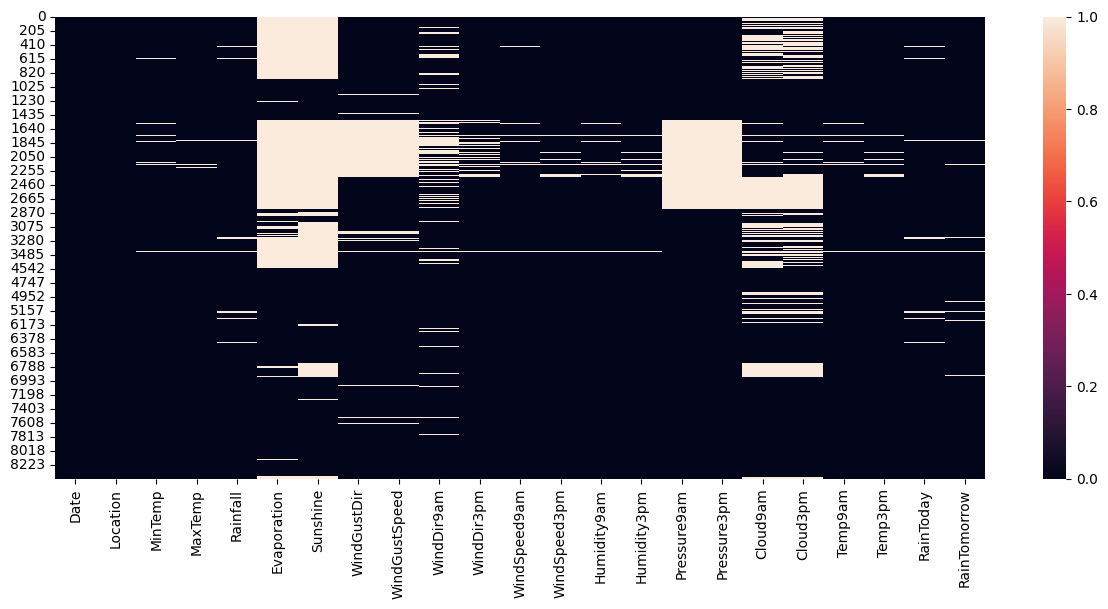

In [9]:
plt.figure(figsize=(15,6))

sns.heatmap(rainfall_data.isnull())

## **Information about Null/ Missing Value**

* Date and Location: No missing values, indicating complete data for these critical identification columns.
* Temperature: MinTemp has 75 missing values, while MaxTemp has 60 missing values, affecting temperature-related analysis.
* Rainfall and Moisture: Rainfall lacks 240 entries; Humidity9am has 59 missing, and Humidity3pm has 102 missing values, impacting rain and humidity-based insights.
* Sunshine and Cloud Cover: Considerable missing data in Sunshine (3994) and Cloud9am/Cloud3pm (2421 and 2455, respectively) will affect analyses involving sunlight and cloud coverage.
* Wind Information: WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, and WindSpeed3pm have varying degrees of missing values, potentially impacting wind-related patterns and forecasts.
* Pressure: Both Pressure9am (1309) and Pressure3pm (1312) exhibit a significant number of missing entries.
* Evaporation: A substantial missing count of 3512 values in the Evaporation column could impact analyses related to evaporation rates.
* Temperature at Specific Times: Temp9am has 56 missing values, and Temp3pm has 96, influencing temperature-based assessments.
* Rain Today and Tomorrow: RainToday and RainTomorrow have the same number of missing values (240 and 239, respectively), affecting rain-related predictions.

In [10]:
rainfall_data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [11]:
# Will impute Null values with mean(),median() and Mode

# By understanding below columns will fill NaNs with mean of respective column 'MinTemp', 'Temp9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm'

rainfall_data['MinTemp'] = rainfall_data['MinTemp'].fillna(rainfall_data['MinTemp'].mean())
rainfall_data['Temp9am'] = rainfall_data['Temp9am'].fillna(rainfall_data['Temp9am'].mean())
rainfall_data['Humidity3pm'] = rainfall_data['Humidity3pm'].fillna(rainfall_data['Humidity3pm'].mean())
rainfall_data['Pressure9am'] = rainfall_data['Pressure9am'].fillna(rainfall_data['Pressure9am'].mean())
rainfall_data['Pressure3pm'] = rainfall_data['Pressure3pm'].fillna(rainfall_data['Pressure3pm'].mean())
rainfall_data['Cloud3pm'] = rainfall_data['Cloud3pm'].fillna(rainfall_data['Cloud3pm'].mean())

# By understanding below columns will fill NaNs with median of respective column 'MaxTemp', 'Temp3pm', 'Humidity9am', 'WindSpeed9am', 'WindSpeed3pm', 'Rainfall', 'Evaporation','Sunshine', 'Cloud9am', 'WindGustSpeed'

rainfall_data['MaxTemp'] = rainfall_data['MaxTemp'].fillna(rainfall_data['MaxTemp'].median())
rainfall_data['Temp3pm'] = rainfall_data['Temp3pm'].fillna(rainfall_data['Temp3pm'].median())
rainfall_data['Humidity9am'] = rainfall_data['Humidity9am'].fillna(rainfall_data['Humidity9am'].median())
rainfall_data['WindSpeed9am'] = rainfall_data['WindSpeed9am'].fillna(rainfall_data['WindSpeed9am'].median())
rainfall_data['WindSpeed3pm'] = rainfall_data['WindSpeed3pm'].fillna(rainfall_data['WindSpeed3pm'].median())
rainfall_data['Rainfall'] = rainfall_data['Rainfall'].fillna(rainfall_data['Rainfall'].median())
rainfall_data['Evaporation'] = rainfall_data['Evaporation'].fillna(rainfall_data['Evaporation'].median())
rainfall_data['Sunshine'] = rainfall_data['Sunshine'].fillna(rainfall_data['Sunshine'].median())
rainfall_data['Cloud9am'] = rainfall_data['Cloud9am'].fillna(rainfall_data['Cloud9am'].median())
rainfall_data['WindGustSpeed'] = rainfall_data['WindGustSpeed'].fillna(rainfall_data['WindGustSpeed'].median())


In [12]:
# By understanding below columns will fill NaNs with mode of respective column

columns_to_impute_with_mode = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for i in columns_to_impute_with_mode:
    rainfall_data[i].fillna(rainfall_data[i].mode()[0], inplace = True)

In [13]:
rainfall_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [14]:
# Converting datatype of 'Date' column to datetime datatype
rainfall_data['Date'] = pd.to_datetime(rainfall_data['Date'])

# Extracting year, month, and day from 'Date' column and storing in separate columns

rainfall_data['Year'] = rainfall_data['Date'].dt.year
rainfall_data['Month'] = rainfall_data['Date'].dt.month
rainfall_data['Day'] = rainfall_data['Date'].dt.day

# Dropping 'Date' column from the dataset

rainfall_data.drop('Date', inplace = True, axis = 1)

In [15]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6762 non-null   object 
 1   MinTemp        6762 non-null   float64
 2   MaxTemp        6762 non-null   float64
 3   Rainfall       6762 non-null   float64
 4   Evaporation    6762 non-null   float64
 5   Sunshine       6762 non-null   float64
 6   WindGustDir    6762 non-null   object 
 7   WindGustSpeed  6762 non-null   float64
 8   WindDir9am     6762 non-null   object 
 9   WindDir3pm     6762 non-null   object 
 10  WindSpeed9am   6762 non-null   float64
 11  WindSpeed3pm   6762 non-null   float64
 12  Humidity9am    6762 non-null   float64
 13  Humidity3pm    6762 non-null   float64
 14  Pressure9am    6762 non-null   float64
 15  Pressure3pm    6762 non-null   float64
 16  Cloud9am       6762 non-null   float64
 17  Cloud3pm       6762 non-null   float64
 18  Temp9am 

In [16]:
rainfall_data.describe().T

count         mean        std     min     25%          50%  \
MinTemp        6762.0    13.109145   5.540667    -2.0     9.0    13.109145   
MaxTemp        6762.0    24.093301   6.130367     8.2    19.6    23.500000   
Rainfall       6762.0     2.723410  10.490138     0.0     0.0     0.000000   
Evaporation    6762.0     4.998980   3.361770     0.0     4.0     4.600000   
Sunshine       6762.0     8.421665   2.789228     0.0     8.8     9.000000   
WindGustSpeed  6762.0    38.702159  13.393977     7.0    30.0    37.000000   
WindSpeed9am   6762.0    12.765602   9.789075     0.0     6.0    11.000000   
WindSpeed3pm   6762.0    17.562703   9.548883     0.0    11.0    17.000000   
Humidity9am    6762.0    67.510500  17.182756    10.0    56.0    68.000000   
Humidity3pm    6762.0    50.467147  18.498341     6.0    38.0    50.000000   
Pressure9am    6762.0  1017.626311   6.027914   989.8  1014.2  1017.626311   
Pressure3pm    6762.0  1015.119923   5.967638   982.9  1011.5  1015.119923   
Cloud9am       6762.0     4.519817   2.492344     0.0     2.0     5.000000   
Cloud3pm       6762.0     4.320988   2.323276     0.0     3.0     4.320988   
Temp9am        6762.0    17.895038   5.722411     1.9    13.9    17.900000   
Temp3pm        6762.0    22.700281   5.972262     7.3    18.4    22.100000   
Year           6762.0  2012.052203   2.301057  2008.0  2010.0  2012.000000   
Month          6762.0     6.462141   3.377471     1.0     4.0     6.000000   
Day            6762.0    15.737208   8.793898     1.0     8.0    16.000000   

                  75%     max  
MinTemp          17.4    28.5  
MaxTemp          28.4    45.5  
Rainfall          0.8   371.0  
Evaporation       5.0   145.0  
Sunshine          9.2    13.9  
WindGustSpeed    46.0   107.0  
WindSpeed9am     19.0    63.0  
WindSpeed3pm     24.0    83.0  
Humidity9am      80.0   100.0  
Humidity3pm      62.0    99.0  
Pressure9am    1020.9  1039.0  
Pressure3pm    1018.4  1036.0  
Cloud9am          7.0     8.0  
Cloud3pm          6.0     8.0  
Temp9am          22.2    39.4  
Temp3pm          26.8    44.1  
Year           2014.0  2017.0  
Month             9.0    12.0  
Day              23.0    31.0

**Insights from describe of dataset:**

* **Temperature:**

 MinTemp: Ranges from -2.0°C to 28.5°C, with a mean of 13.11°C.
 MaxTemp: Ranges from 8.2°C to 45.5°C, mean at 24.10°C.
 Temp9am & Temp3pm: Averaging 17.90°C and 22.71°C respectively.

* **Precipitation & Evaporation:**

  Rainfall: Spans 0.0 mm to 371.0 mm, with an average of 2.78 mm.
  Evaporation: Varies from 0.0 mm to 145.0 mm, mean at 5.30 mm.

* **Sunshine & Wind:**

  Sunshine: Ranges 0.0 hours to 13.9 hours, averaging 7.89 hours.
  WindGustSpeed: Speed spans 7.0 km/h to 107.0 km/h, mean at 38.98 km/h.
  WindSpeed9am & WindSpeed3pm: Averaging 12.78 km/h and 17.57 km/h respectively.

* **Humidity & Pressure:**

  Humidity9am: Between 10% and 100%, mean at 67.51%.
  Humidity3pm: Ranges from 6% to 99%, mean at 50.47%.
  Pressure9am & Pressure3pm: Averages around 1017.63 hPa and 1015.12 hPa respectively.

* **Cloud Cover:**

 Cloud9am & Cloud3pm: Averaging approximately 4.34 and 4.32 respectively.

* **Time & Date:**

  Year: Spans 2008 to 2017, averaging at 2012.05.
  Month & Day: Monthly and daily averages at 6.46 and 15.74 respectively.

In [17]:
# Willseperate for numerical and categerica column frommail dataset

categorical_columns = []
numerical_columns = []

for i in rainfall_data.columns:
  if rainfall_data[i].dtypes == 'object':
    categorical_columns.append(i)
  elif rainfall_data[i].dtypes =='float64' or rainfall_data[i].dtypes =='int64':
    numerical_columns.append(i)


print(categorical_columns)
print(numerical_columns)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [18]:
# unique Values for Categorical columns

print(rainfall_data['Location'].unique())

print(rainfall_data['WindGustDir'].unique())

print(rainfall_data['WindDir9am'].unique())

print(rainfall_data['WindDir3pm'].unique())

print(rainfall_data['RainToday'].unique())

print(rainfall_data['RainTomorrow'].unique())

print(rainfall_data['RainTomorrow'].unique())

['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'E' 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

### **Tempurature Distribution**

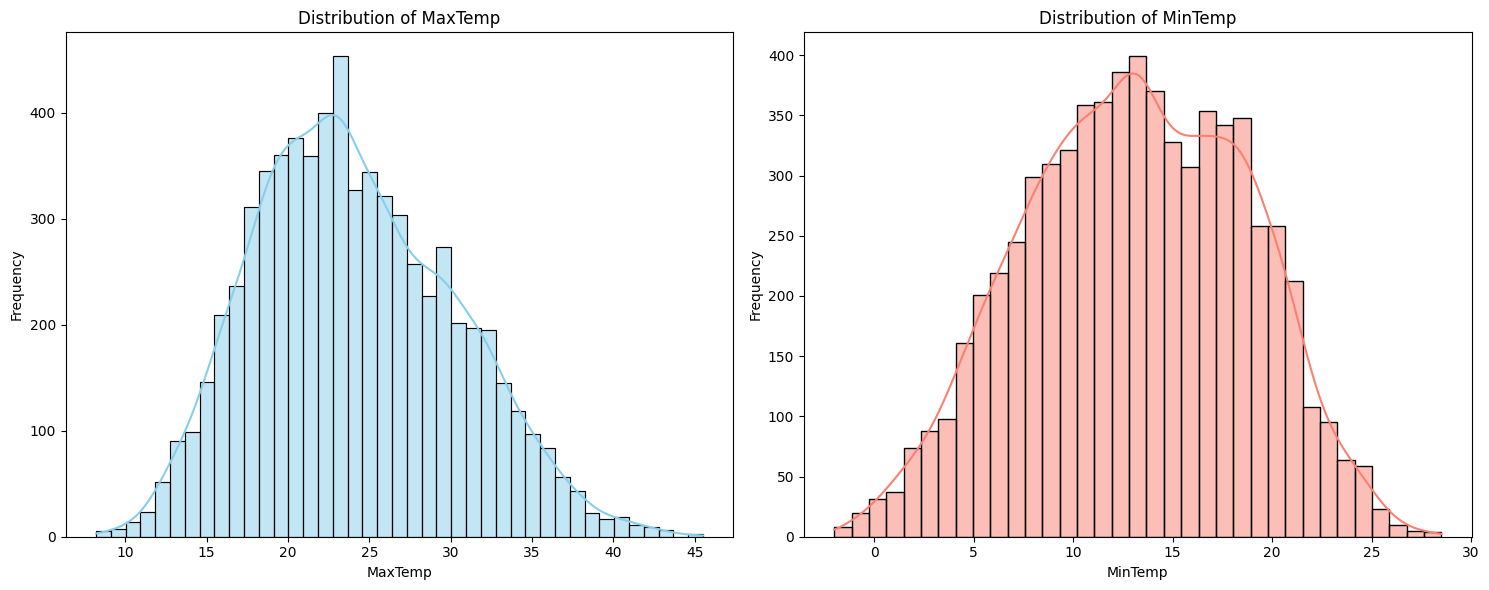

In [19]:
temp_column = rainfall_data[['MaxTemp','MinTemp']]

temp_column

# Create distribution plots
plt.figure(figsize=(15,6))

# Distribution plot for MaxTemp
plt.subplot(1, 2, 1)
sns.histplot(temp_column['MaxTemp'], kde=True, color='skyblue')
plt.title('Distribution of MaxTemp')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')

# Distribution plot for MinTemp
plt.subplot(1, 2, 2)
sns.histplot(temp_column['MinTemp'], kde=True, color='salmon')
plt.title('Distribution of MinTemp')
plt.xlabel('MinTemp')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insights from above chart:**

* MaxTemp Distribution:

   The distribution of 'MaxTemp' appears to be somewhat normal, centered around the mean temperature.

    The values range between 8.2°C and 45.5°C, with a higher frequency in the mid-range temperatures.
    There is a noticeable peak around the mean temperature of approximately 24.1°C.

* MinTemp Distribution:

    'MinTemp' also showcases a relatively normal distribution, with values ranging from -2.0°C to 28.5°C.
    
    Similar to 'MaxTemp', the peak occurs around the mean temperature of about 13.1°C, showing a distribution that leans towards the lower end.

**'MaxTemp' has a broader range and tends to have higher temperatures than 'MinTemp', which covers a narrower range with lower temperatures.**

#### Chart - 2

### **Rainfall Variation**


Text(0.5, 1.0, 'Line Plot: Year vs Rainfall')

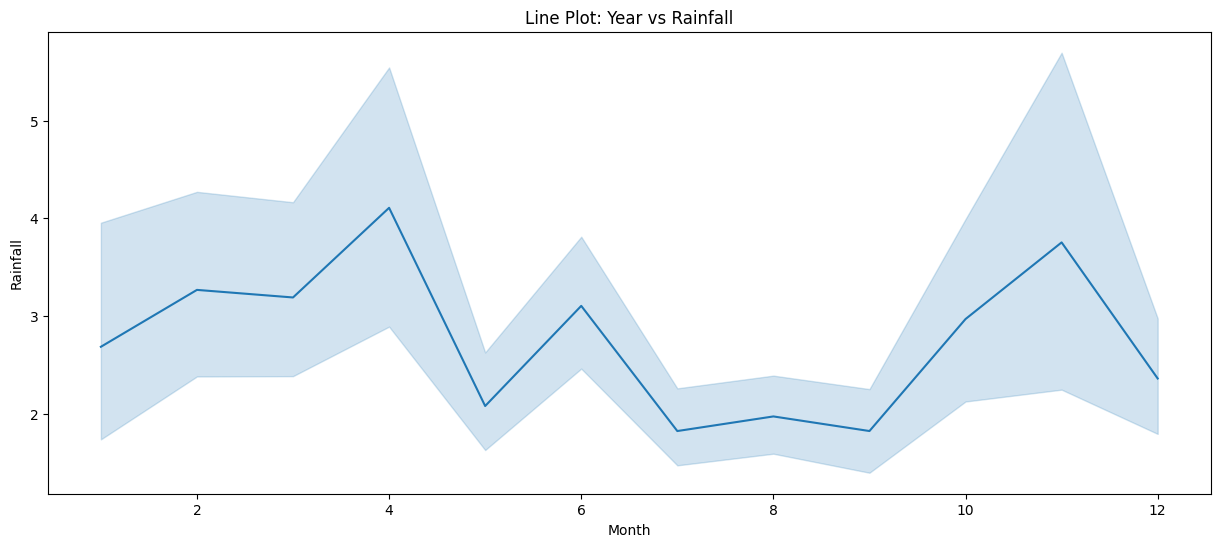

In [20]:
month_rainfall = rainfall_data.groupby('Month')['Rainfall'].mean()

month_rainfall

plt.figure(figsize = (15,6))
sns.lineplot(data = rainfall_data, x = 'Month', y = 'Rainfall')
plt.title("Line Plot: Year vs Rainfall")

**Insights from above chart:**

* The plot displays the fluctuation in rainfall across different months, providing insights into the seasonal distribution of rainfall data.
* Months with higher rainfall values (such as April and November) stand out, indicating potential rainy seasons or specific weather patterns during those months.
* Months with lower rainfall (like July and August) suggest drier periods or seasons.

**Understanding the variations in rainfall assists in analyzing climatic patterns, aiding meteorological or environmental studies and facilitating decision-making in agriculture, water resource management, or urban planning.The visualization helps in assessing the potential impact of rainfall variations on various sectors, such as agriculture, hydrology, or ecology, during different months of the year.**

#### Chart - 3

### **Wind Speed Comparison**


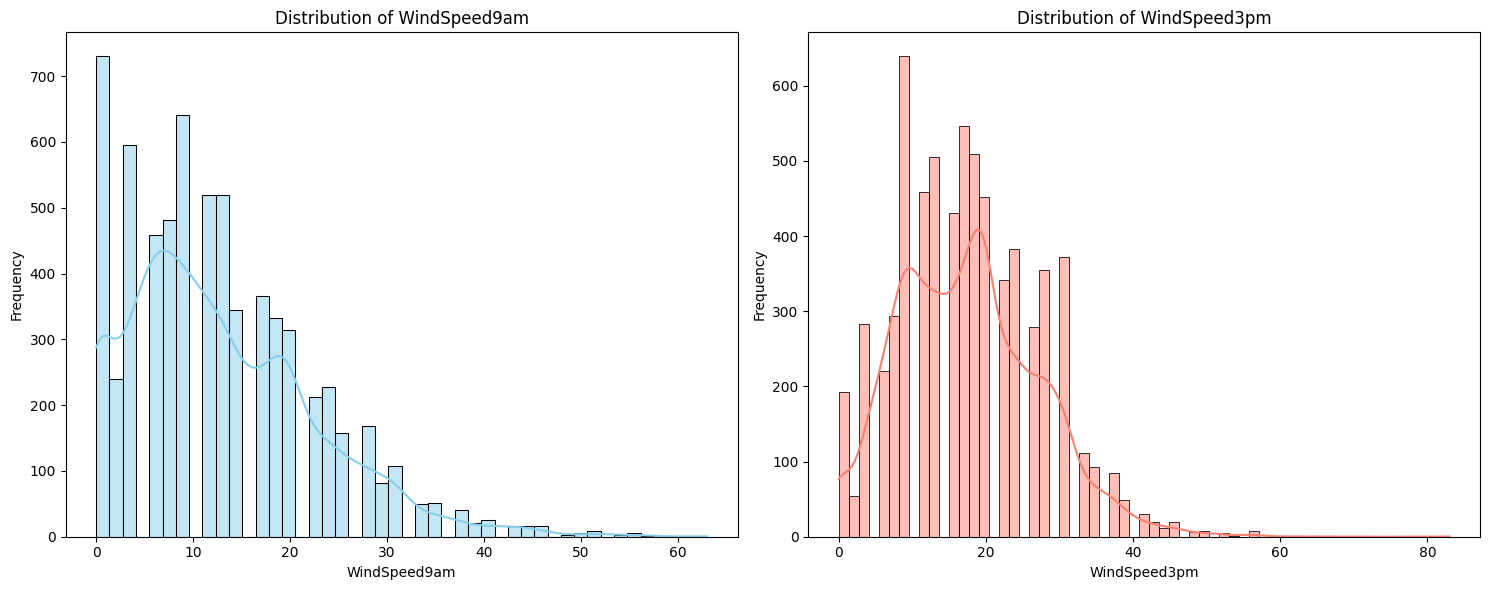

In [21]:
windspeed = rainfall_data[['WindSpeed9am','WindSpeed3pm']]

windspeed

# Create distribution plots
plt.figure(figsize=(15,6))

# Distribution plot for MaxTemp
plt.subplot(1, 2, 1)
sns.histplot(windspeed['WindSpeed9am'], kde=True, color='skyblue')
plt.title('Distribution of WindSpeed9am')
plt.xlabel('WindSpeed9am')
plt.ylabel('Frequency')

# Distribution plot for MinTemp
plt.subplot(1, 2, 2)
sns.histplot(windspeed['WindSpeed3pm'], kde=True, color='salmon')
plt.title('Distribution of WindSpeed3pm')
plt.xlabel('WindSpeed3pm')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insights from above chart:**

* **WindSpeed9am Distribution:**

  The distribution of 'WindSpeed9am' seems to be skewed towards lower wind speeds.
  
  The values range between 0 km/h and 63 km/h, with a higher frequency observed at lower wind speeds, often below 20 km/h.
  
  There is a noticeable peak around the lower values, indicating a majority of calm to moderate winds in the morning.

* **WindSpeed3pm Distribution:**

 'WindSpeed3pm' distribution also exhibits a similar trend, but the values seem to be slightly higher compared to the morning readings.

 The range extends from 0 km/h to 83 km/h, with a higher frequency around moderate wind speeds, especially between 10 km/h and 30 km/h.

 There's a wider spread of wind speeds in the afternoon, encompassing higher velocities compared to the morning.

**Both distributions display a right-skewed pattern, indicating more occurrences of lower wind speeds than higher ones.The distribution of 'WindSpeed3pm' shows a broader range and slightly higher speeds compared to 'WindSpeed9am', suggesting increased wind activity in the afternoon hours.**

#### Chart - 4

### **Humidity Trends**


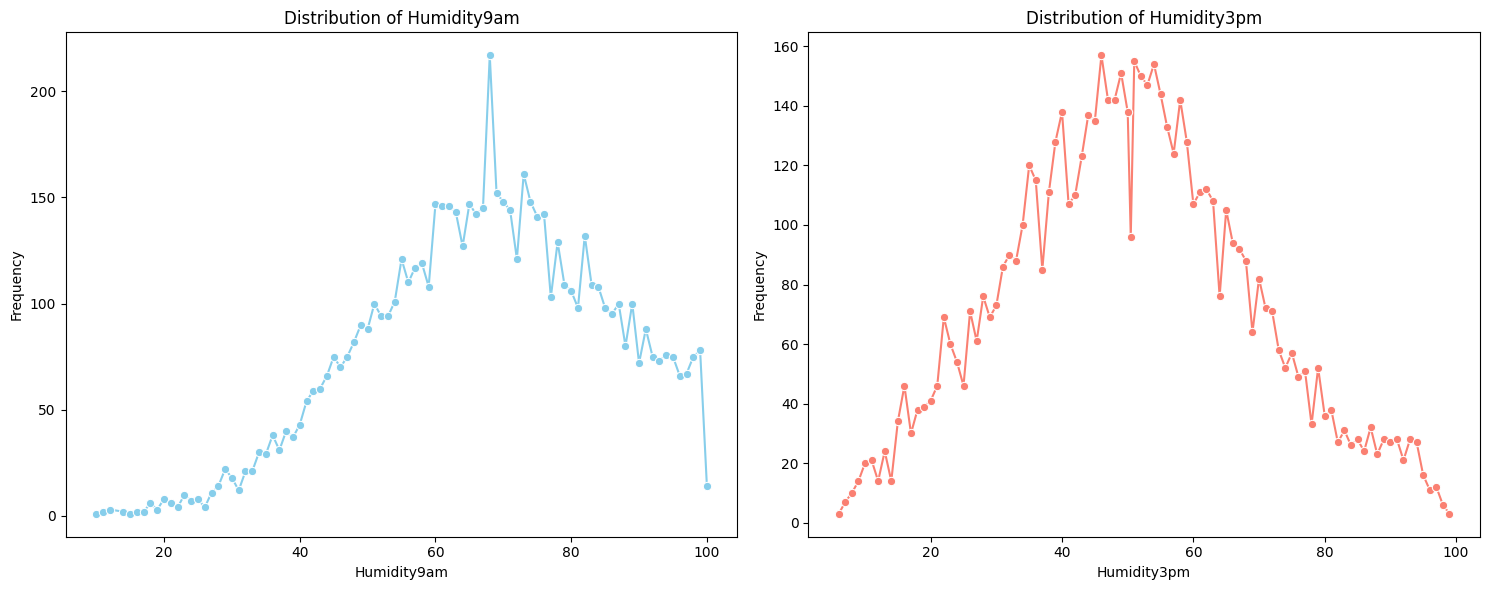

In [22]:
humidity_trend = rainfall_data[['Humidity9am','Humidity3pm']]

humidity_trend


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=humidity_trend['Humidity9am'].value_counts().sort_index(), marker='o', color='skyblue')
plt.title('Distribution of Humidity9am')
plt.xlabel('Humidity9am')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.lineplot(data=humidity_trend['Humidity3pm'].value_counts().sort_index(), marker='o', color='salmon')
plt.title('Distribution of Humidity3pm')
plt.xlabel('Humidity3pm')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insights from above Chart**

* **Humidity at 9 am:**

  The line plot displays the distribution of humidity values at 9 am.
  
  The frequency of humidity levels varies, with a peak or concentration around specific humidity values.

* **Humidity at 3 pm:**

   Similar to Humidity9am, there are varying frequencies of humidity levels at 3 pm, possibly indicating distinct prevalent humidity conditions in the afternoon.

**Comparing both distributions, it's possible to observe shifts or changes in humidity levels from morning to afternoon.**

#### Chart - 5

### **Pressure Changes**


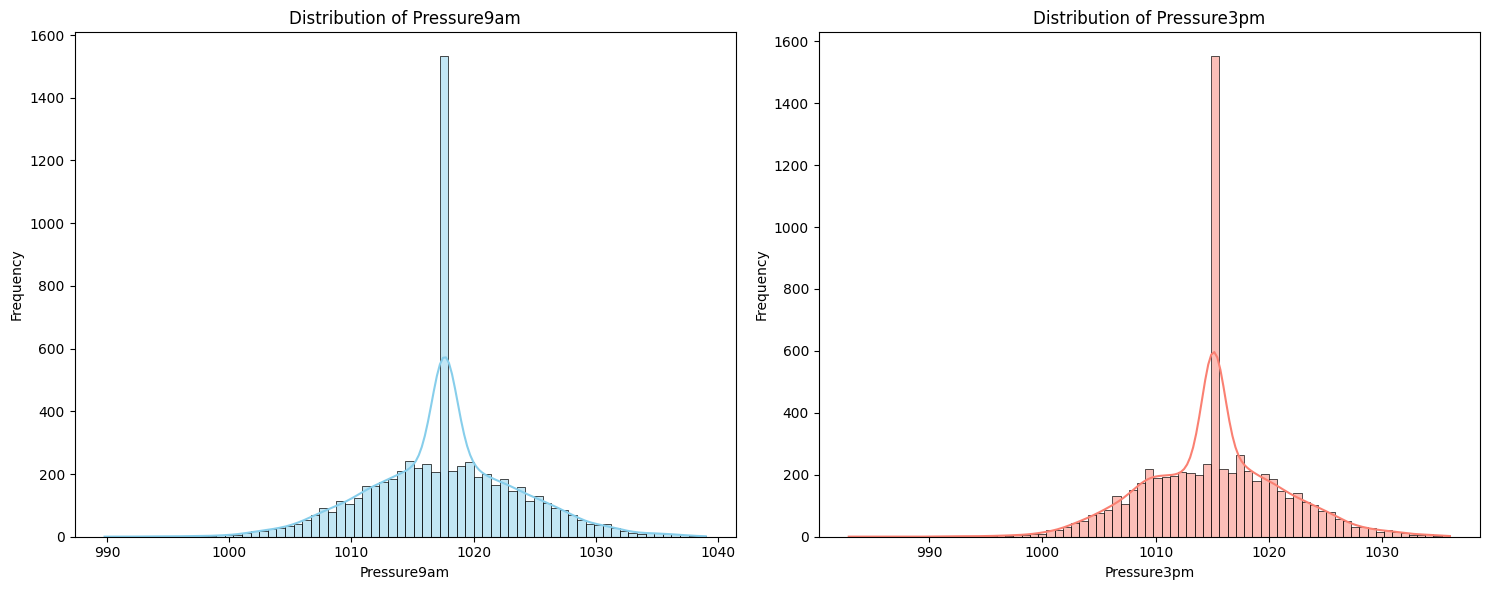

In [23]:
pressure_change = rainfall_data[['Pressure9am','Pressure3pm']]

pressure_change


plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.histplot(pressure_change['Pressure9am'], kde=True, color='skyblue')
plt.title('Distribution of Pressure9am')
plt.xlabel('Pressure9am')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(pressure_change['Pressure3pm'], kde=True, color='salmon')
plt.title('Distribution of Pressure3pm')
plt.xlabel('Pressure3pm')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insights from above chart:**

* **Pressure9am Distribution:**

  The distribution of 'Pressure9am' seems relatively normal, with values ranging between 989.8 hPa to 1039.0 hPa.
  
  It shows a slightly skewed distribution towards higher pressure values, with a central tendency around the mean pressure of approximately 1017.6 hPa.

* **Pressure3pm Distribution:**

  'Pressure3pm' also exhibits a somewhat normal distribution, covering a range from 982.9 hPa to 1036.0 hPa.
  
  Similar to 'Pressure9am', it leans slightly towards higher pressure values, with the mean pressure at about 1015.1 hPa.

**Both plots highlight the spread and concentration of pressure readings, providing an understanding of the pressure variations during morning and afternoon timeframes.**

#### Chart - 6

### **Cloud Coverage Comparison**


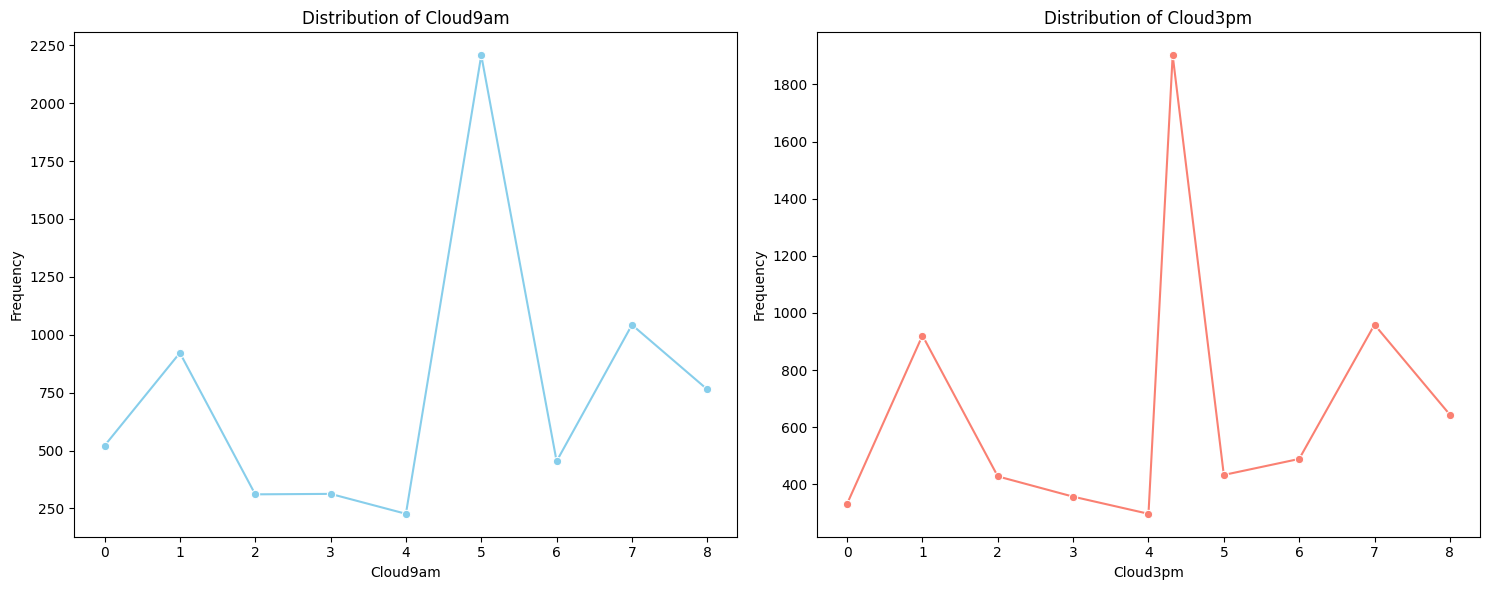

In [24]:
cloud_coverage = rainfall_data[['Cloud9am','Cloud3pm']]

cloud_coverage

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=cloud_coverage['Cloud9am'].value_counts().sort_index(), marker='o', color='skyblue')
plt.title('Distribution of Cloud9am')
plt.xlabel('Cloud9am')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.lineplot(data=cloud_coverage['Cloud3pm'].value_counts().sort_index(), marker='o', color='salmon')
plt.title('Distribution of Cloud3pm')
plt.xlabel('Cloud3pm')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insights from above chart:**

* **Cloud9am Distribution:**

  The distribution of cloud coverage at 9 am ('Cloud9am') shows varying frequencies for different levels of cloud cover.
  
  The plot displays distinct peaks and drops, suggesting varying occurrences of different cloud cover levels at this time.
  
  There are several discrete values for cloud coverage, indicating specific categories or levels of cloudiness at 9 am.

* **Cloud3pm Distribution:**

  Similarly, the distribution of cloud coverage at 3 pm ('Cloud3pm') showcases varying frequencies for different levels of cloud cover.
   
  The pattern here might differ from the 9 am distribution, indicating potential changes in cloud cover throughout the day.

  As with the 9 am plot, it displays discrete values for different levels of cloudiness at 3 pm.

#### Chart - 7

### **Wind Gust Speed by Direction**


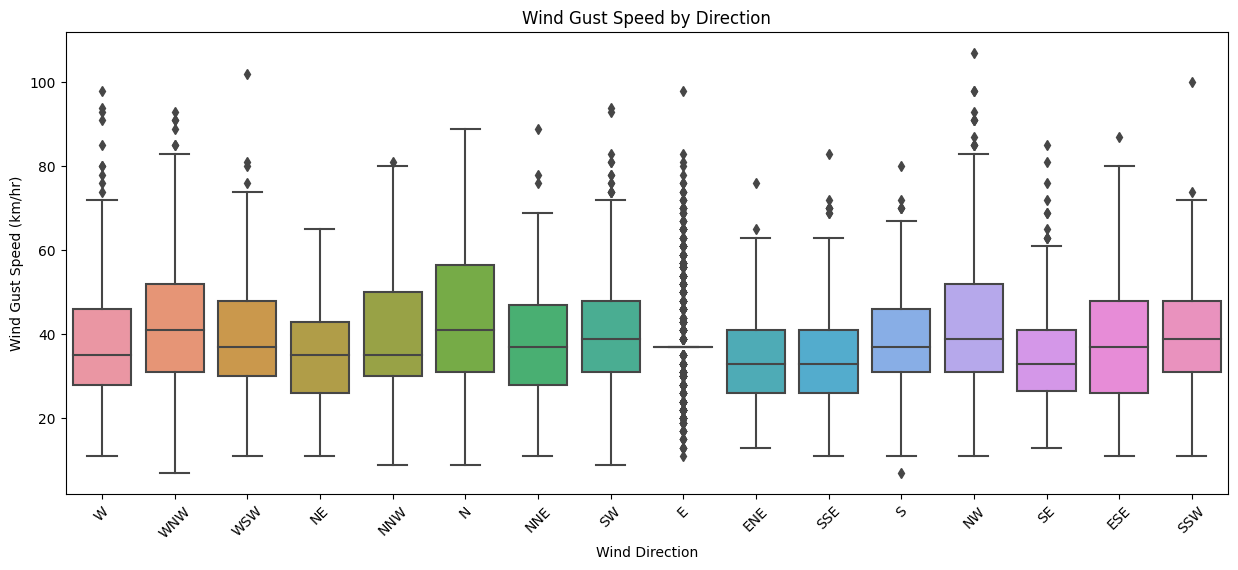

In [25]:
wind_guest = rainfall_data.groupby('WindGustDir')['WindGustSpeed'].mean()

wind_guest

plt.figure(figsize=(15, 6))
sns.boxplot(x='WindGustDir', y='WindGustSpeed', data=rainfall_data)
plt.title('Wind Gust Speed by Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Gust Speed (km/hr)')
plt.xticks(rotation=45)
plt.show()

**Insights from above chart:**

*  The boxplot visualizes the distribution of wind gust speeds across different wind directions.The wind gust speeds vary across different wind directions, ranging from approximately 34 km/hr to 43 km/hr. This indicates variability in wind strength depending on the direction.
* There's diversity in the gust speeds associated with each wind direction. For, 'N' (North), 'NW' (Northwest), and 'WNW' (West-Northwest) exhibit relatively higher wind gust speeds compared to others.
* Certain directions, such as 'N' (North) and 'NW' (Northwest), show consistently higher gust speeds, indicating potential prevailing wind patterns in those directions.
* Some wind directions, like 'ENE' (East-Northeast), 'ESE' (East-Southeast), 'NE' (Northeast), and 'SE' (Southeast), seem to have similar or closer wind gust speed values.


#### Chart - 8

### **Evaporation Rates**


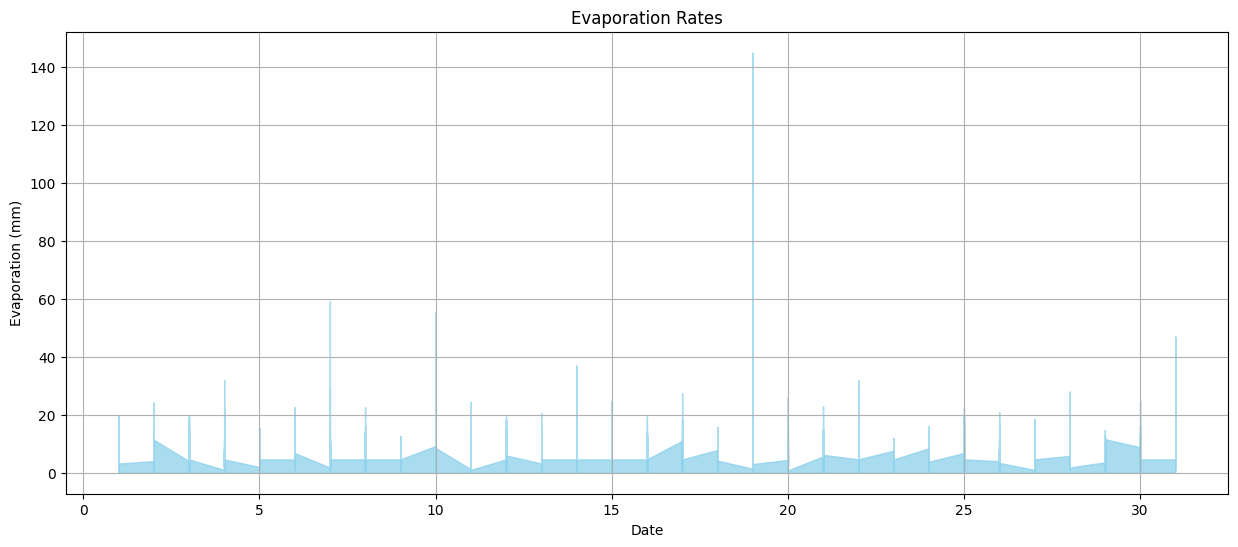

In [26]:

weather_data = rainfall_data.sort_values('Day')

weather_data

plt.figure(figsize=(15,6))
plt.fill_between(weather_data['Day'], weather_data['Evaporation'], color='skyblue', alpha=0.7)
plt.title('Evaporation Rates')
plt.xlabel('Date')
plt.ylabel('Evaporation (mm)')
plt.grid(True)
plt.show()

**Insights from above chart:**

* The plot visualizes the trend of evaporation rates over a period sorted by days.
* The filled area plot indicates the magnitude of evaporation in millimeters for each day in the sorted dataset.
* Steeper inclines or declines in the filled areas might suggest abrupt changes in evaporation rates between specific days.

#### Chart - 9

### **Minimum Temperature vs Maximum Temperature by Rain Tomorrow**


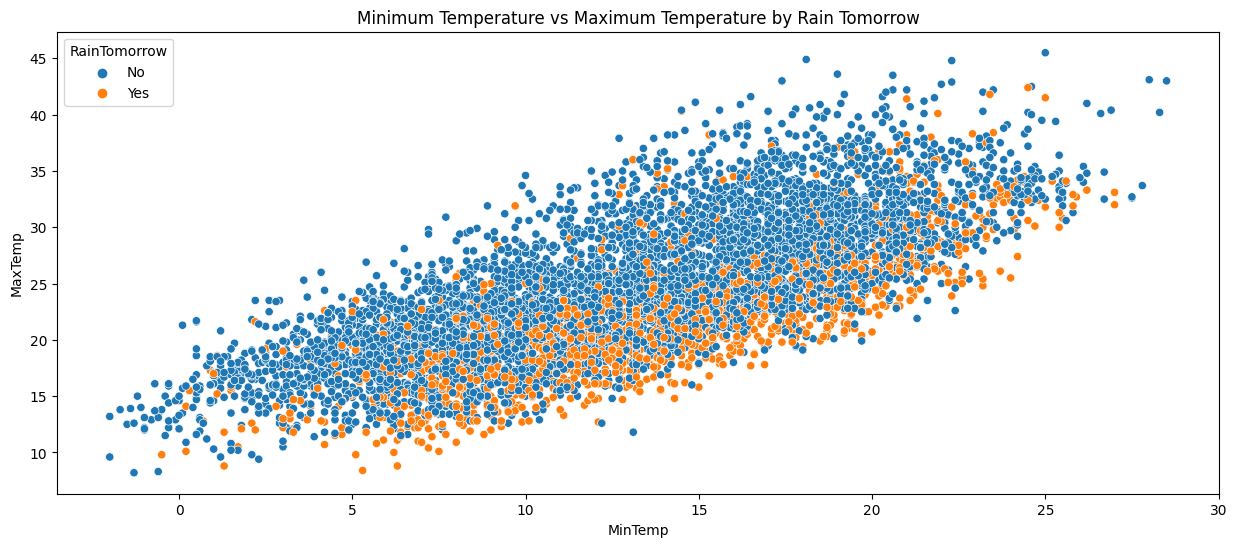

In [27]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'MinTemp', y = 'MaxTemp', hue = 'RainTomorrow', data = rainfall_data)
plt.title("Minimum Temperature vs Maximum Temperature by Rain Tomorrow")
plt.show()

**Insights from above chart:**

* The majority of data points are clustered or concentrated in the 'No' category for 'RainTomorrow' (indicating no rain)
* The scatter plot predominantly shows points clustered around combinations of 'Minimum Temperature' and 'Maximum Temperature' where 'RainTomorrow' is labeled as 'No'
* There are significantly fewer occurrences where 'RainTomorrow' is labeled as 'Yes' (rain) across the range of 'Minimum Temperature' and 'Maximum Temperature'.
* This observation suggests that the dataset might be imbalanced regarding the occurrence of rain ('Yes') and no rain ('No').

#### Chart - 10

### **Sunshine vs Evaporation by Rain Tomorrow**


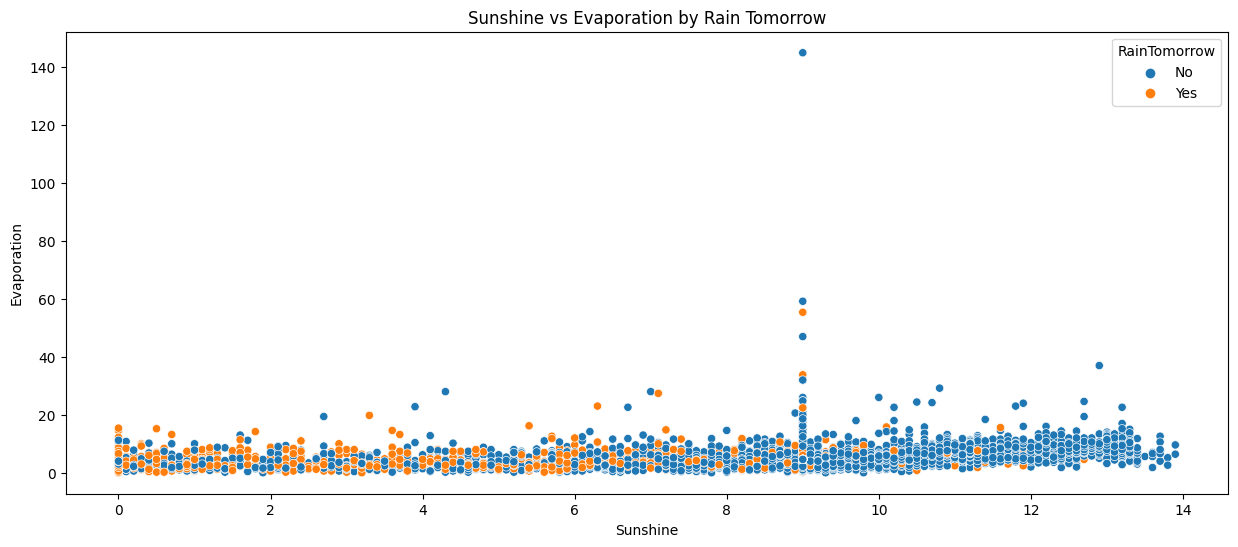

In [28]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Sunshine', y = 'Evaporation', hue = 'RainTomorrow', data = rainfall_data)
plt.title("Sunshine vs Evaporation by Rain Tomorrow")
plt.show()

**Insights from above chart:**

* The majority of data points are clustered in the 'No' category for 'RainTomorrow' (indicating no rain).Comparatively, the 'Yes' category (indicating rain) shows significantly fewer data points.
* This pattern in the scatter plot suggests a potential imbalance within the dataset concerning the occurrence of rain ('Yes') and no rain ('No'). The 'No' category appears to have a higher representation compared to the 'Yes' category.
* The concentration of data points in the 'No' category for 'RainTomorrow' concerning different levels of 'Sunshine' and 'Evaporation' might imply that certain combinations of these variables are more common during non-rainy days.

### **Will Move aheah for Label Encoding**

In [29]:
rainfall_data.head(2)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.6       9.0           W   
1   Albury      7.4     25.1       0.0          4.6       9.0         WNW   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0  4.320988   
1         44.0         25.0       1010.6       1007.8       5.0  4.320988   

   Temp9am  Temp3pm RainToday RainTomorrow  Year  Month  Day  
0     16.9     21.8        No           No  2008     12    1  
1     17.2     24.3        No           No  2008     12    2

In [30]:
# In dataset we have categorical column like 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'. Will Use LabelEncoder.


from sklearn.preprocessing import LabelEncoder

LabelEnco = LabelEncoder()

rainfall_data['Location'] = LabelEnco.fit_transform(rainfall_data['Location'])

rainfall_data['WindGustDir'] = LabelEnco.fit_transform(rainfall_data['WindGustDir'])

rainfall_data['WindDir9am'] = LabelEnco.fit_transform(rainfall_data['WindDir9am'])

rainfall_data['WindDir3pm'] = LabelEnco.fit_transform(rainfall_data['WindDir3pm'])

rainfall_data['RainToday'] = LabelEnco.fit_transform(rainfall_data['RainToday'])

rainfall_data['RainTomorrow'] = LabelEnco.fit_transform(rainfall_data['RainTomorrow'])

In [31]:
rainfall_data.head(2)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6          4.6       9.0           13   
1         1      7.4     25.1       0.0          4.6       9.0           14   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0  4.320988   
1         44.0         25.0       1010.6       1007.8       5.0  4.320988   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8          0             0  2008     12    1  
1     17.2     24.3          0             0  2008     12    2

## As per problem statement need to built model for **'Whether or Not It Will Rain Tomorrow'** and **'How Much Rainfall Could Be There'**

## **Firstly will built model for 'Whether or Not It Will Rain Tomorrow'**

#### Outliers Treatment

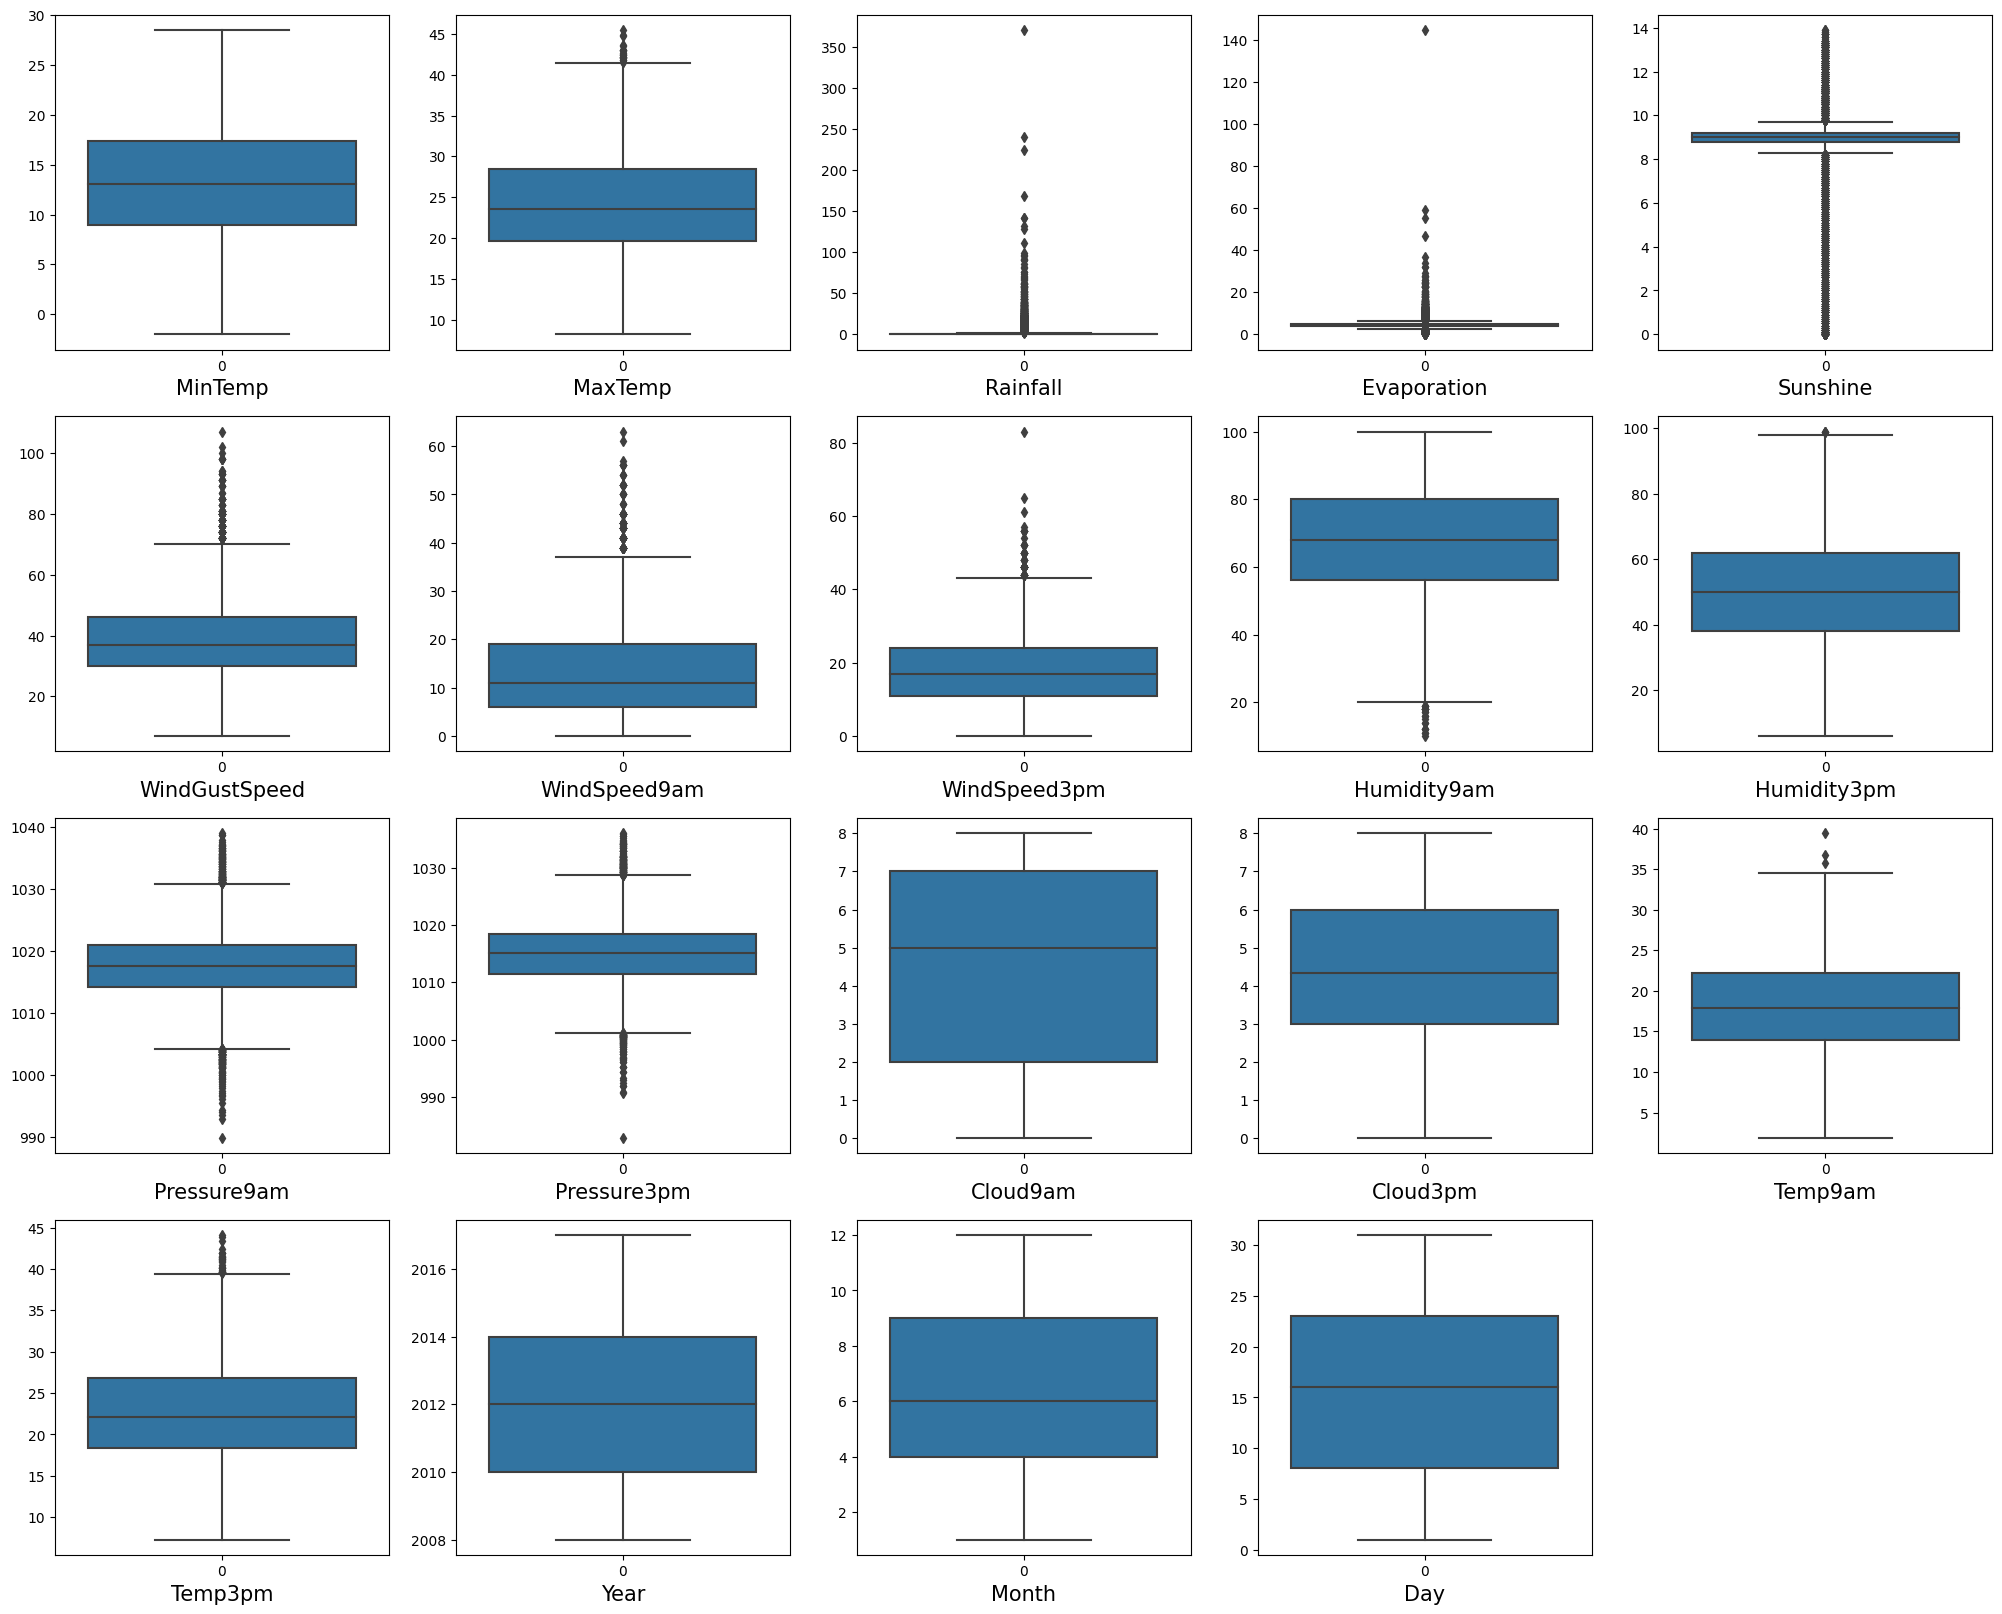

In [32]:
# Will check for outliers

numerical_columns = rainfall_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                     'Year', 'Month', 'Day']]

plt.figure(figsize=(25,20))
graph = 1

for column in numerical_columns:
  if graph<=21:
    plt.subplot(4,5,graph)
    ax=sns.boxplot(data= numerical_columns[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

**From above boxplot we can observe that we have ouliers in 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', and 'Temp3pm' columns.**

In [33]:
# Will use z-score method for treating outliers

columns_with_outliers = ['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                         'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm' ]
from scipy import stats

# Define a threshold for the Z-score
z_score_threshold = 3

# Numerical columns are as defined above

# Create a copy of the dataset for outlier treatment
no_outliers = rainfall_data.copy()

for col in columns_with_outliers:
    z_scores = stats.zscore(no_outliers[col])
    no_outliers = no_outliers[(z_scores < z_score_threshold) & (z_scores > -z_score_threshold)]

# Display the shape of the dataset after removing outliers
print("Shape of data after outlier removal:", no_outliers.shape)

Shape of data after outlier removal: (6219, 25)


#### Skewness

<ipython-input-34-a5a0f38a7851>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(numerical_columns[column])
<ipython-input-34-a5a0f38a7851>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(numerical_columns[column])
<ipython-input-34-a5a0f38a7851>:11: UserWarning: 

`distplot` is a depre

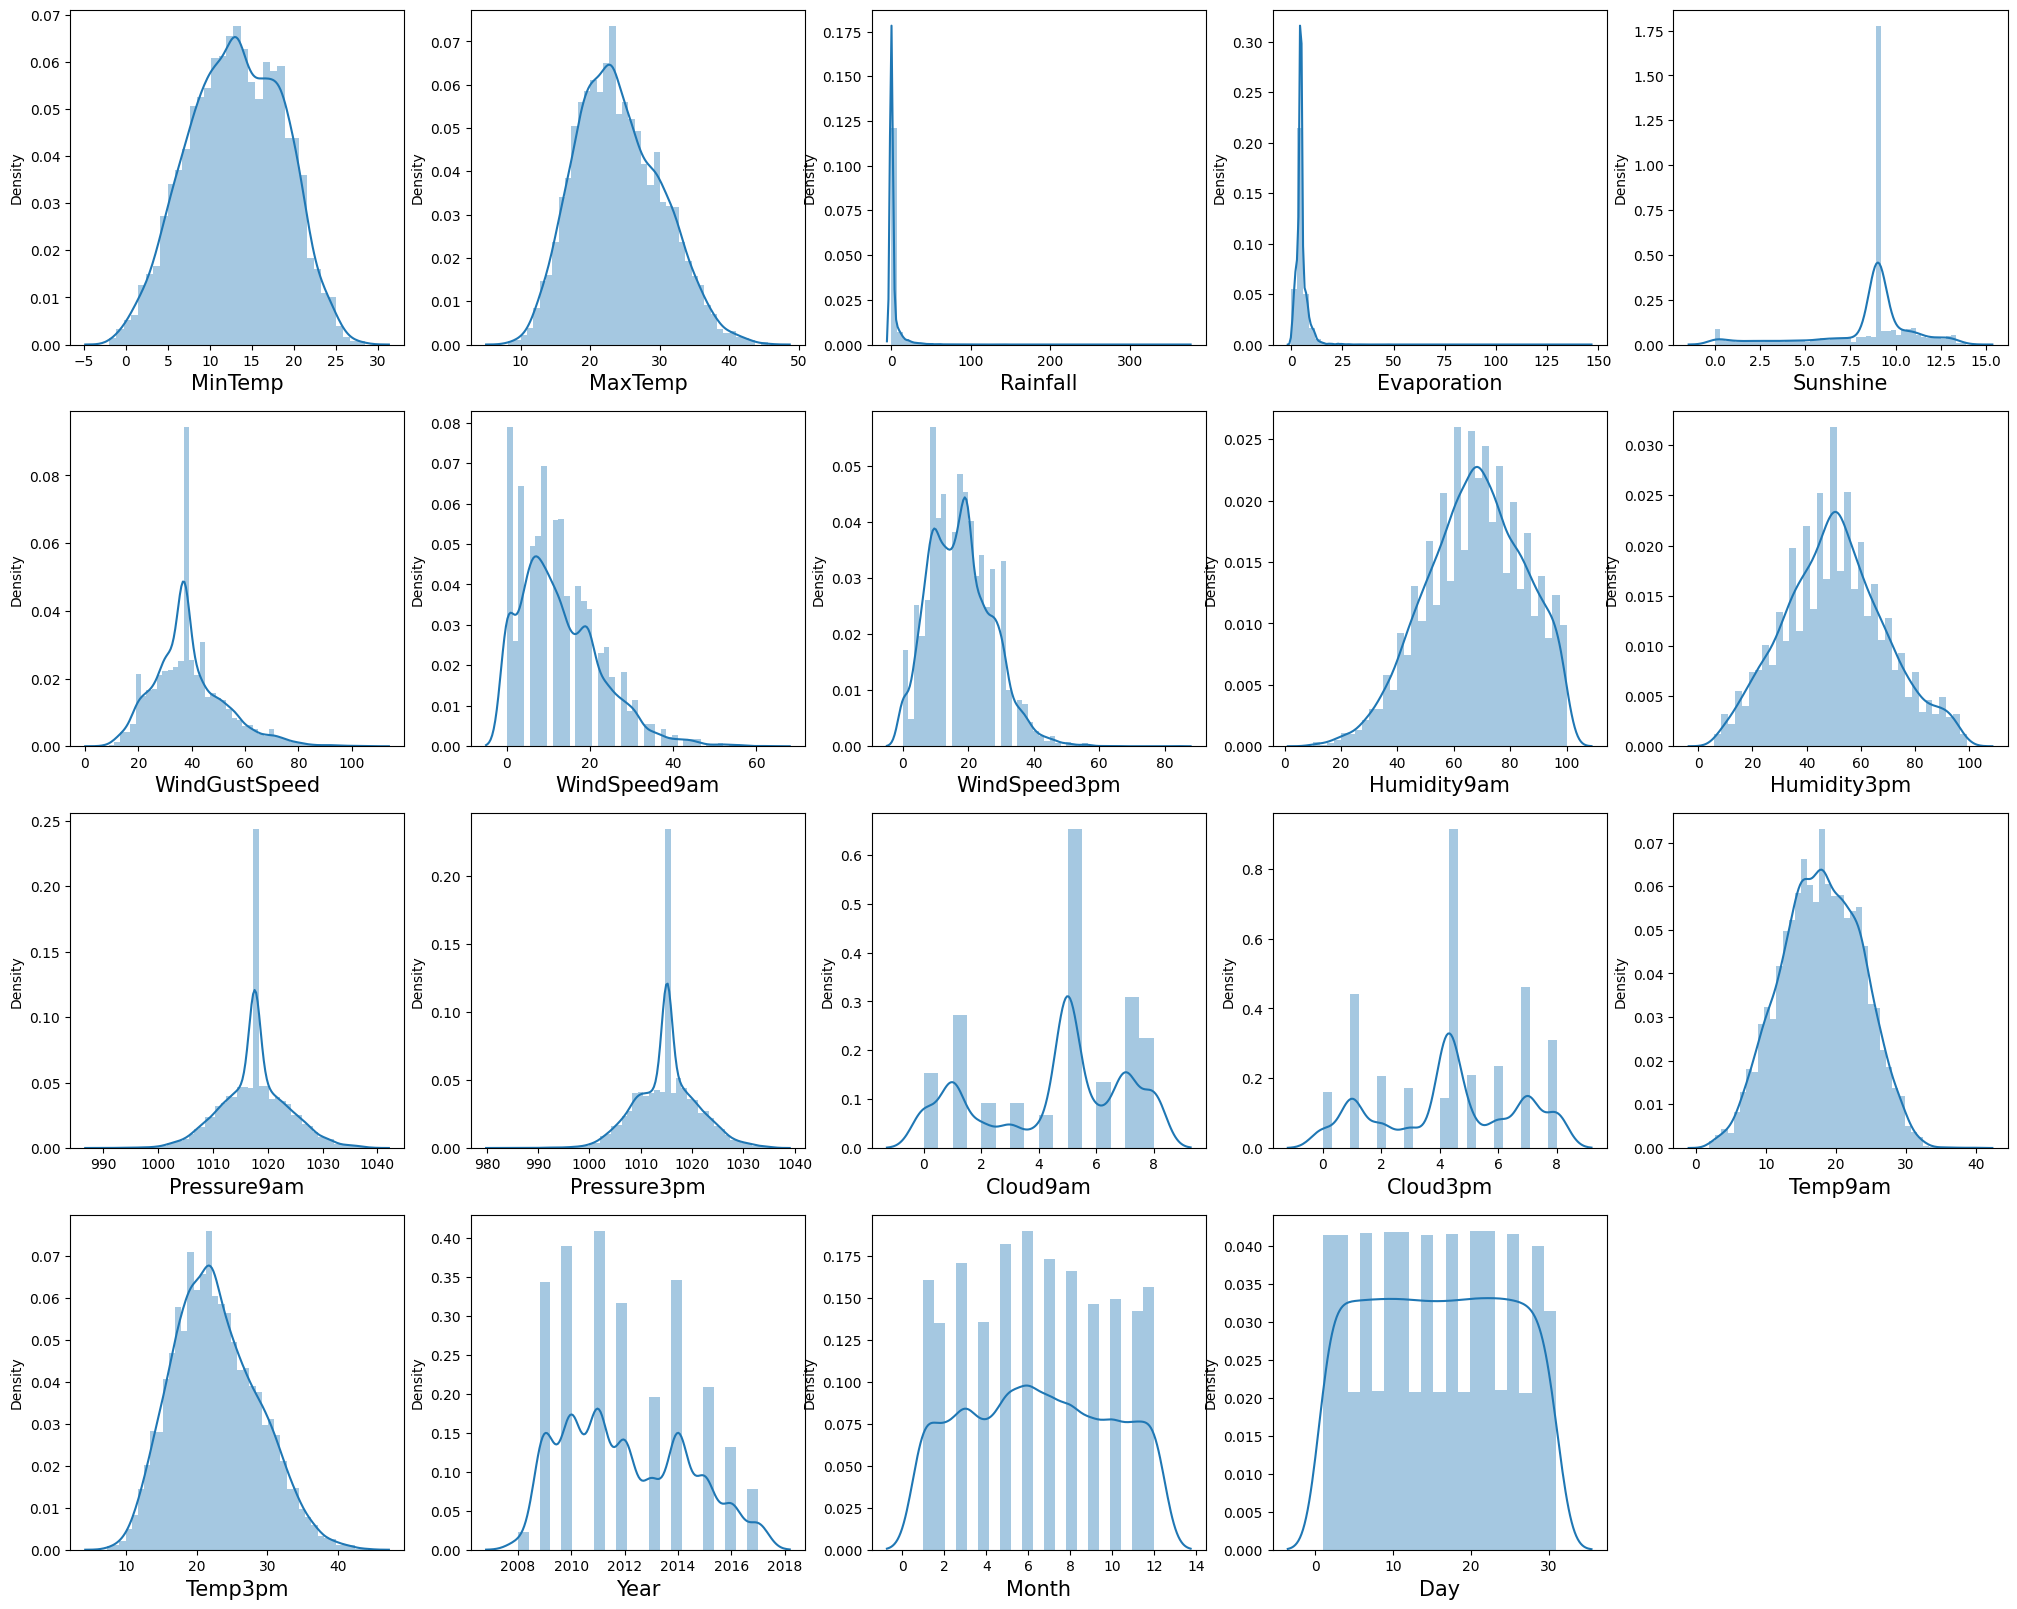

In [34]:
numerical_columns = rainfall_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                     'Year', 'Month', 'Day']]

plt.figure(figsize=(25,20))
graph = 1

for column in numerical_columns:
  if graph<=21:
    plt.subplot(4,5,graph)
    ax=sns.distplot(numerical_columns[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

**Insights/observation from skewness plot:**

* **Symmetric Distribution:**

  'MinTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Month', 'Day': These features display relatively symmetric distributions with no significant skewness.

* **Right-Skewed Distribution:**

  'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Temp3pm', 'Year': These features show right-skewed distributions where the majority of data tends to be towards lower values, with a tail extending towards higher values.

* **Left-Skewed Distribution:**

  'Sunshine', 'Humidity9am', 'Cloud9am', 'Cloud3pm': These features exhibit left-skewed distributions, implying that the majority of data points are towards higher values, with a tail extending towards lower values.

**Skewness is present in 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', and 'WindSpeed9am' columns.**

In [35]:
# Using yeojohnson method for resucing skewness

from scipy.stats import zscore, yeojohnson

# List of the columns to be transformed
columns_to_transform = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am']

# Copying data
no_outliers = no_outliers.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform:
    transformed_data, lambda_value = yeojohnson(no_outliers[column] + 1)
    no_outliers[column] = transformed_data


# will check skewness of updated columns

no_outliers[columns_to_transform].skew()

Rainfall         1.170773
Evaporation      0.032754
Sunshine        -0.006108
WindGustSpeed    0.008592
WindSpeed9am    -0.092109
dtype: float64

### Heatmap and Correlation Matrix

               Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.094254  0.069145  0.009212     0.108597  0.062298   
MinTemp        0.094254  1.000000  0.738994  0.066423     0.388398  0.078387   
MaxTemp        0.069145  0.738994  1.000000 -0.243701     0.483821  0.353772   
Rainfall       0.009212  0.066423 -0.243701  1.000000    -0.213378 -0.254205   
Evaporation    0.108597  0.388398  0.483821 -0.213378     1.000000  0.470969   
Sunshine       0.062298  0.078387  0.353772 -0.254205     0.470969  1.000000   
WindGustDir   -0.083534 -0.142181 -0.198256  0.116425    -0.118967 -0.117789   
WindGustSpeed  0.275279  0.264786  0.183631  0.078695     0.203377  0.047529   
WindDir9am    -0.101080 -0.021655 -0.193900  0.151910    -0.118314 -0.110092   
WindDir3pm     0.005952 -0.143164 -0.165992  0.119056    -0.026824 -0.055671   
WindSpeed9am   0.230521  0.194087  0.077076  0.010790     0.141091  0.030513   
WindSpeed3pm   0.221379  0.201592  0.126

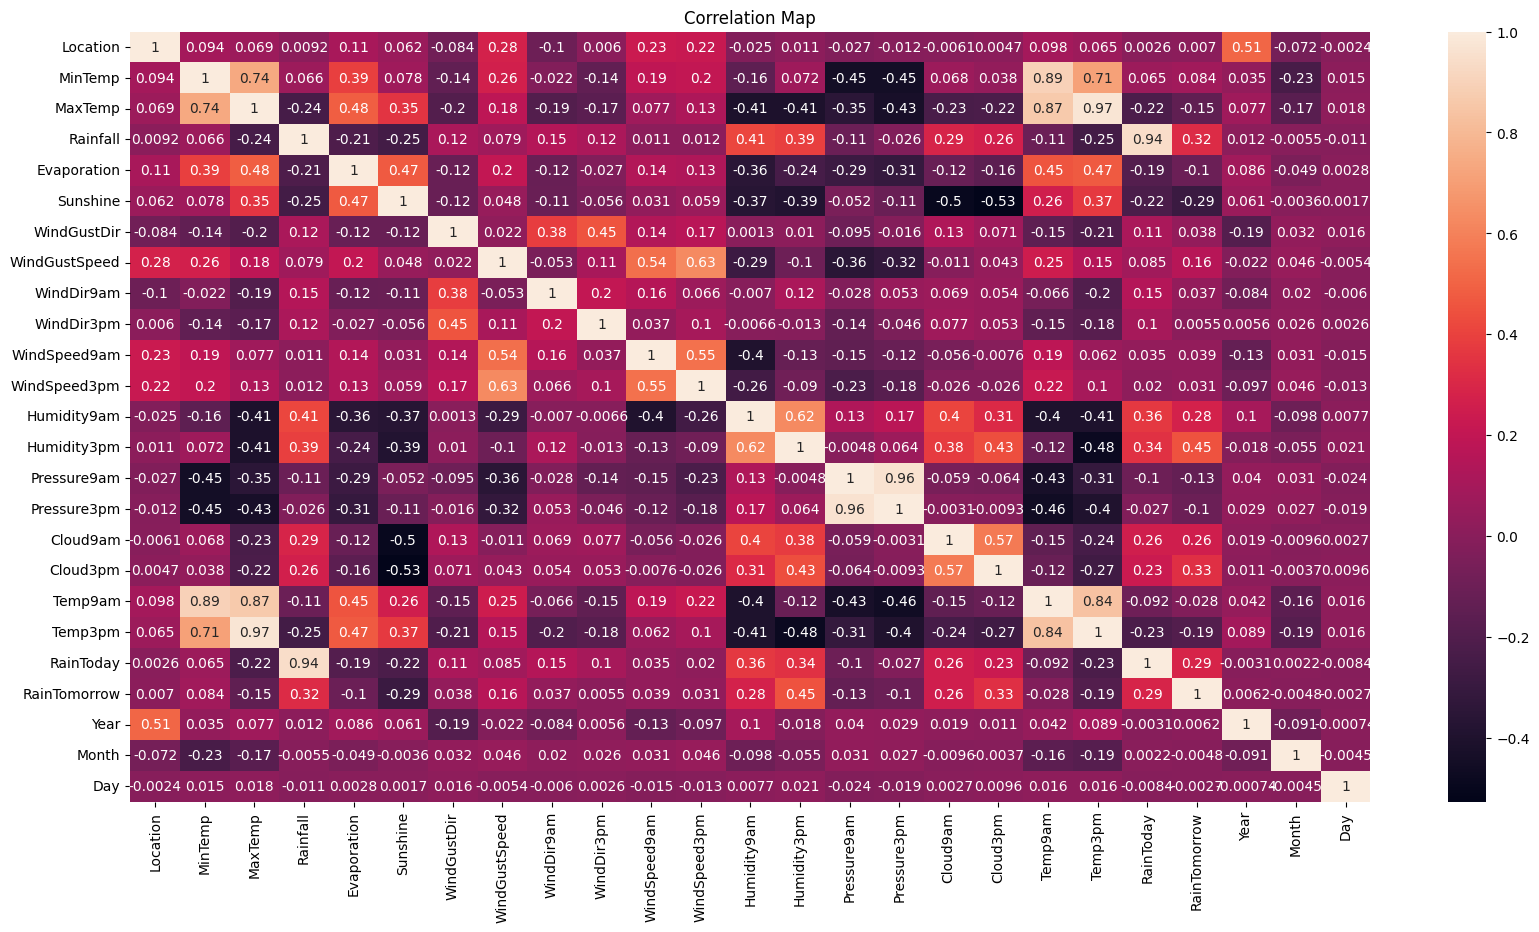

In [36]:
correlation_data = no_outliers

correlation_matrix = correlation_data.corr()

print(correlation_matrix)

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

**Insights from Heatmap and correlation matrix:**

* Location: Strong positive correlation with 'Year', weak negative correlation with 'Sunshine', minimal correlation with other numerical variables.

* Temperature (MinTemp, MaxTemp, Temp9am, Temp3pm): Strong positive correlations among themselves. Positive correlation with temperature-related variables and negative correlation with humidity variables.

* Rainfall: Positive correlation with wind speed variables, negative correlation with sunshine, evaporation, and afternoon cloudiness.

* Evaporation: Positive correlation with temperatures, negative correlation with humidity.

* Sunshine: Positive correlation with temperatures, negative correlation with rainfall and afternoon cloudiness.

* WindGustDir, WindDir9am, WindDir3pm: Weak correlations with numerical variables.

* WindGustSpeed, WindSpeed9am, WindSpeed3pm: Positive correlation with each other, WindGustSpeed also correlates with 'Location' and 'Year'.

* Humidity9am, Humidity3pm: Negative correlation with temperature variables.

* Pressure9am, Pressure3pm: Negative correlation with 'Location', positive correlation with 'Year'.

* Cloud9am, Cloud3pm: Negative correlation with sunshine, positive correlation with humidity.

* RainToday, RainTomorrow: Weak correlation between these binary rain indicators.

* Year, Month, Day: Correlations with weather-related variables, suggesting potential variations over time, but not very strong.

### To check VIF, will define feature and target Variables

In [38]:
x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

vif       features
0    1.658052       Location
1    9.294897        MinTemp
2   26.101674        MaxTemp
3   10.097285       Rainfall
4    1.747523    Evaporation
5    2.014343       Sunshine
6    1.591047    WindGustDir
7    2.238966  WindGustSpeed
8    1.349761     WindDir9am
9    1.426705     WindDir3pm
10   2.040393   WindSpeed9am
11   1.998980   WindSpeed3pm
12   4.140459    Humidity9am
13   5.254068    Humidity3pm
14  20.072823    Pressure9am
15  19.360410    Pressure3pm
16   1.905769       Cloud9am
17   1.845489       Cloud3pm
18  17.837433        Temp9am
19  32.527012        Temp3pm
20   9.323735      RainToday
21   1.582136           Year
22   1.145304          Month
23   1.004750            Day

#### From VIF we can observe that 'Temp3pm' have higest VIF.Dropping same from dataset.

In [39]:
# Dropping 'Temp3pm' feature

no_outliers.drop('Temp3pm', inplace = True, axis = 1)

In [40]:
# Again Checking for VIF,

x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

vif       features
0    1.657960       Location
1    9.245671        MinTemp
2    9.559787        MaxTemp
3   10.096987       Rainfall
4    1.747493    Evaporation
5    2.011628       Sunshine
6    1.587316    WindGustDir
7    2.232233  WindGustSpeed
8    1.348395     WindDir9am
9    1.425919     WindDir3pm
10   2.039947   WindSpeed9am
11   1.993743   WindSpeed3pm
12   3.701365    Humidity9am
13   3.592440    Humidity3pm
14  19.646552    Pressure9am
15  19.000032    Pressure3pm
16   1.902758       Cloud9am
17   1.836185       Cloud3pm
18  16.546334        Temp9am
19   9.323595      RainToday
20   1.582131           Year
21   1.129665          Month
22   1.004304            Day

#### From VIF we can observe that 'Pressure9am' have higest VIF.Dropping same from dataset.

In [41]:
# Dropping 'Pressure9am' feature

no_outliers.drop('Pressure9am', inplace = True, axis = 1)

In [42]:
# Again Checking for VIF,

x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

vif       features
0    1.655831       Location
1    9.139612        MinTemp
2    9.210092        MaxTemp
3   10.075917       Rainfall
4    1.733956    Evaporation
5    2.002458       Sunshine
6    1.575278    WindGustDir
7    2.216876  WindGustSpeed
8    1.324247     WindDir9am
9    1.353138     WindDir3pm
10   2.033596   WindSpeed9am
11   1.982676   WindSpeed3pm
12   3.701300    Humidity9am
13   3.590807    Humidity3pm
14   1.444108    Pressure3pm
15   1.902704       Cloud9am
16   1.834689       Cloud3pm
17  16.506563        Temp9am
18   9.323555      RainToday
19   1.581402           Year
20   1.128455          Month
21   1.003290            Day

#### From VIF we can observe that 'Temp9am' have higest VIF.Dropping same from dataset.

In [43]:
# Dropping 'Temp9am' feature

no_outliers.drop('Temp9am', inplace = True, axis = 1)

In [44]:
# Again Checking for VIF,

x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

vif       features
0    1.653019       Location
1    4.832173        MinTemp
2    5.580741        MaxTemp
3   10.067582       Rainfall
4    1.727805    Evaporation
5    1.995889       Sunshine
6    1.572909    WindGustDir
7    2.175793  WindGustSpeed
8    1.323227     WindDir9am
9    1.353064     WindDir3pm
10   2.010193   WindSpeed9am
11   1.925128   WindSpeed3pm
12   2.609255    Humidity9am
13   2.838366    Humidity3pm
14   1.441507    Pressure3pm
15   1.868472       Cloud9am
16   1.832148       Cloud3pm
17   9.322774      RainToday
18   1.575710           Year
19   1.113957          Month
20   1.003166            Day

**Seems like all varibales are in certain range of VIF**

In [45]:
no_outliers['RainTomorrow'].value_counts()

0    4891
1    1328
Name: RainTomorrow, dtype: int64

In [46]:
x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']

y.value_counts()


0    4891
1    1328
Name: RainTomorrow, dtype: int64

### **There is imbalance in dataset, will use SMOTE method to minimize class imbalnce in target varibale**

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x, y = smote.fit_resample(x,y)

y.value_counts()

0    4891
1    4891
Name: RainTomorrow, dtype: int64

### **All EDA, Feature selection and class imbalance done, will now built ML model**

### ML Model - 1

#### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import math

# Defining x and y variable

x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Predicting on test set results
y_pred = log_reg.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(log_reg, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Logistic Regression after hypertuning model :",grid_search_cv.best_score_*100)

Logistic Regression
Accuracy score: 85.63772775991426
Classifiction report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91      1493
           1       0.72      0.46      0.56       373

    accuracy                           0.86      1866
   macro avg       0.80      0.71      0.74      1866
weighted avg       0.85      0.86      0.84      1866

Confusion matrix:
 [[1426   67]
 [ 201  172]]




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



Cross Validation Scores: [85.93247588 82.63665595 75.80385852 83.84244373 84.5534996 ]


Best Parameters for hypertuning Parameters : {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score for Logistic Regression after hypertuning model : 83.48298296316825


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

**Insights from Logistic Regression Model:**

* The model achieves an overall accuracy of approximately 85.64%. It correctly predicts the class label for about 85.64% of the samples in the dataset.
* For Class 0 (presumably the majority class), the model performs well with precision, recall, and F1-score around 0.88, 0.96, and 0.91 respectively. However, for Class 1, the precision, recall, and F1-score are lower at approximately 0.72, 0.46, and 0.56 respectively.
* It shows the model's predicted values versus the actual values. It indicates 1426 True Negatives (TN), 67 False Positives (FP), 201 False Negatives (FN), and 172 True Positives (TP).
* Cross-Validation Scores: The model's consistency across folds is evaluated via cross-validation, with scores ranging from 75.80% to 85.93%. This indicates the model's reliability across different data splits.
* Hypertuning Results: The best parameters found through hypertuning suggest regularization ('penalty': 'l2') with 'C' as 1 and 'max_iter' as 100 using 'newton-cg' solver, achieving a validation score of around 83.48%.

### ML Model - 2

#### K Neighbors Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Defining x and y variable

x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# Predicting on test set results
y_pred = knn_classifier.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("K Neighbors Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(knn_classifier, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_knn = {
    'n_neighbors': [5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 25, 30],
    'p': [1, 2]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for K Neighbors Classifier after hypertuning model :",grid_search_cv.best_score_*100)

K Neighbors Classifier
Accuracy score: 82.20793140407288
Classifiction report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.89      1493
           1       0.59      0.36      0.45       373

    accuracy                           0.82      1866
   macro avg       0.72      0.65      0.67      1866
weighted avg       0.80      0.82      0.81      1866

Confusion matrix:
 [[1398   95]
 [ 237  136]]




Cross Validation Scores: [80.14469453 76.04501608 75.         81.27009646 83.02493966]


Best Parameters for hypertuning Parameters : {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Score for K Neighbors Classifier after hypertuning model : 82.15049421328372


**Insights from K Neighbors Classifier:**

* The model achieved an accuracy of approximately 82.21%, indicating the percentage of correctly predicted instances out of the total.
* For class 0 (likely the negative class), the precision (correctly predicted negatives out of all predicted negatives) is 86%, recall (true negative rate) is 94%, and F1-score (harmonic mean of precision and recall) is 89%.For class 1 (likely the positive class), the precision is 59%, recall is 36%, and F1-score is 45%.
* The consistency of scores across folds (ranging from 75% to 83%) suggests reasonable stability in model performance.
* The hyperparameters chosen after hypertuning the model ('algorithm', 'leaf_size', 'n_neighbors', 'p', 'weights') might have slightly improved the accuracy, but the improvement is marginal.

**The model performs reasonably well in overall accuracy, but its ability to correctly identify positive instances (class 1) needs improvement, especially in terms of recall and precision**

### ML Model - 3

#### SVC

In [52]:
from sklearn.svm import SVC

# Defining x and y variable

x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)

# Predicting on test set results
y_pred = svc_classifier.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("SVC classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(svc_classifier, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': ['auto'],
    'degree': [3, 4]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(SVC(), param_grid=param_grid_svc, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for SVC Classifier after hypertuning model :",grid_search_cv.best_score_*100)

SVC classifier
Accuracy score: 85.31618435155413
Classifiction report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1493
           1       0.73      0.42      0.53       373

    accuracy                           0.85      1866
   macro avg       0.80      0.69      0.72      1866
weighted avg       0.84      0.85      0.84      1866

Confusion matrix:
 [[1435   58]
 [ 216  157]]




Cross Validation Scores: [78.6977492  78.61736334 78.61736334 78.61736334 78.68061142]


Best Parameters for hypertuning Parameters : {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
Best Score for SVC Classifier after hypertuning model : 83.52903915436082


**Insights from SVC Model:**

* The model correctly predicts the target variable (binary classification) approximately 85% of the time on the test data.
* For Class 0 (Negative Class):

    Precision: 0.87 (Out of the predicted negatives, 87% are actually negatives)
    
    Recall: 0.96 (The model identifies 96% of the actual negatives)
* For Class 1 (Positive Class):
    
    Precision: 0.73 (Out of the predicted positives, 73% are actually positives)
    
    Recall: 0.42 (The model identifies 42% of the actual positives)

* 1435 true negatives, 58 false positives, 216 false negatives, and 157 true positives.

* Best Parameters after Hyperparameter Tuning: Best Parameters for hypertuning Parameters : {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
* Best Score after Tuning: 83.52%

**The model performs well in correctly predicting the majority class (Class 0, with higher precision and recall), suggesting it's better at identifying instances from this class.Hyperparameter tuning marginally improved the model's performance, showcasing the potential for further enhancement.**

### ML Model - 4

#### Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Defining x and y variable

x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
Decision_tress = DecisionTreeClassifier()
Decision_tress.fit(x_train, y_train)

# Predicting on test set results
y_pred = Decision_tress.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Decision Tree Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(Decision_tress, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Decision Tree Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Decision Tree Classifier
Accuracy score: 77.491961414791
Classifiction report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1493
           1       0.44      0.46      0.45       373

    accuracy                           0.77      1866
   macro avg       0.65      0.66      0.66      1866
weighted avg       0.78      0.77      0.78      1866

Confusion matrix:
 [[1273  220]
 [ 200  173]]




Cross Validation Scores: [74.03536977 57.95819936 64.38906752 68.48874598 80.37007241]


Best Parameters for hypertuning Parameters : {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score for Decision Tree Classifier after hypertuning model : 81.43843118624386


**Insights from Decision Tree Classifier:**
* The model achieved an accuracy score of approximately 77.49%.
* For class '0': Precision is 0.86, Recall is 0.85, and F1-score is 0.86.
* For class '1': Precision is 0.45, Recall is 0.49, and F1-score is 0.47.
* The CV scores range from approximately 57.64% to 80.85%, indicating variability in model performance across different data splits.
* The hyperparameters obtained after hypertuning the model indicate the best combination that resulted in an improved accuracy of approximately 81.43%.

**The model shows relatively good accuracy but has room for improvement, especially in correctly predicting class '1'.Precision and recall for class '1' are lower, suggesting that the model struggles to identify this class accurately.**

### ML Model - 5

#### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Defining x and y variable

x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
rand_forest = RandomForestClassifier()
rand_forest.fit(x_train, y_train)

# Predicting on test set results
y_pred = rand_forest.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Random Forest Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(rand_forest, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_rf = {
    'n_estimators': [50, 100],
    'criterion': ['gini'],
    'max_depth': [None,10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Random Forest Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Random Forest Classifier
Accuracy score: 85.95927116827438
Classifiction report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1493
           1       0.73      0.47      0.57       373

    accuracy                           0.86      1866
   macro avg       0.81      0.71      0.74      1866
weighted avg       0.85      0.86      0.85      1866

Confusion matrix:
 [[1430   63]
 [ 199  174]]




Cross Validation Scores: [84.24437299 79.74276527 73.23151125 73.1511254  84.15124698]




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters for hypertuning Parameters : {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Random Forest Classifier after hypertuning model : 83.98817583171675


**Insights from Random Forest Classifier:**
* Accuracy: The model achieves an accuracy score of approximately 85.96%
* Precision for class 0 (not the positive class): 88%; for class 1 (the positive class): 73%
* Recall for class 0: 96%; for class 1: 47%.
* The model correctly identifies 1428 non-events and 176 events but misclassifies 65 non-events and 197 events.
* The average cross-validation accuracy scores range between 73% to 84%.
* After hyperparameter tuning, the best model yields an accuracy of approximately 83.98%. It indicates an improvement from the untuned model (85.98%), although it's slightly lower.

### ML Model - 6

#### Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining x and y variable

x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
gboost = GradientBoostingClassifier()
gboost.fit(x_train, y_train)

# Predicting on test set results
y_pred = gboost.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Gradient Boosting Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(gboost, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_gb = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gb, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Gradient Boosting Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Gradient Boosting Classifier
Accuracy score: 86.06645230439443
Classifiction report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1493
           1       0.73      0.48      0.58       373

    accuracy                           0.86      1866
   macro avg       0.80      0.72      0.75      1866
weighted avg       0.85      0.86      0.85      1866

Confusion matrix:
 [[1426   67]
 [ 193  180]]




Cross Validation Scores: [84.00321543 81.59163987 68.08681672 72.18649518 83.82944489]


Best Parameters for hypertuning Parameters : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best Score for Gradient Boosting Classifier after hypertuning model : 83.91950064003589


**Insights from Gradient Boosting Classifier:**
* The model achieved an accuracy score of approximately 86%.
* The precision for class 1 (0.88) indicates the model's ability to correctly identify positive cases, while recall (0.48) shows its coverage of actual positive cases. The F1-score (0.58) balances precision and recall.
* The matrix reveals that the model correctly classified 1426 instances of class 0 and 180 instances of class 1. However, it misclassified 67 instances of class 0 and 193 instances of class 1.
* The best parameters obtained after hyperparameter tuning include a learning rate of 0.05, a maximum depth of 3, and 200 estimators for the Gradient Boosting Classifier.
* The best score achieved after hyperparameter tuning is approximately 84%, showing an improvement from the initial score.

### ML Model - 7

#### Extra Trees Classifier

In [57]:
from sklearn.ensemble import ExtraTreesClassifier

# Defining x and y variable

x = no_outliers.drop(columns=['RainTomorrow'])
y = no_outliers['RainTomorrow']


# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
extra_tree = ExtraTreesClassifier()
extra_tree.fit(x_train, y_train)

# Predicting on test set results
y_pred = extra_tree.predict(x_test)
y_pred

# Evalution Matrix

Accuracy = accuracy_score(y_test, y_pred)*100

Classification_Report = classification_report(y_test, y_pred)

Confusion_Matrix = confusion_matrix(y_test, y_pred)

print("Extra Trees Classifier")
print("Accuracy score:", Accuracy)
print("Classifiction report:\n", Classification_Report)
print("Confusion matrix:\n", Confusion_Matrix)
print('\n')


# Cross Validiation

cv_score = cross_val_score(extra_tree, x, y)

print('\n')
print("Cross Validation Scores:", cv_score*100)
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_et = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesClassifier(), param_grid=param_grid_et, cv=5, scoring='accuracy')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Extra Trees Classifier after hypertuning model :",grid_search_cv.best_score_*100)

Extra Trees Classifier
Accuracy score: 85.04823151125403
Classifiction report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1493
           1       0.71      0.42      0.53       373

    accuracy                           0.85      1866
   macro avg       0.79      0.69      0.72      1866
weighted avg       0.84      0.85      0.84      1866

Confusion matrix:
 [[1429   64]
 [ 215  158]]




Cross Validation Scores: [84.08360129 79.09967846 75.48231511 77.57234727 83.26629123]




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters for hypertuning Parameters : {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score for Extra Trees Classifier after hypertuning model : 83.73564538052443


**Insights from Extra Trees Classifier:**
* The model achieves an accuracy of approximately 84.57%,
* Precision for class 0 (negative class) is high at 0.86, suggesting a good proportion of correctly predicted negative cases among all predicted negatives.Precision for class 1 (positive class) is lower at 0.70, indicating a moderate proportion of correctly predicted positive cases among all predicted positives.
* Recall for class 0 is high (0.96), suggesting the model captured a high percentage of actual negatives.Recall for class 1 is lower (0.40), indicating that the model captured fewer actual positive cases among all positives.
* The cross-validation scores range from approximately 72.83% to 84.24%, demonstrating model consistency across different subsets of the data.
* Best parameters obtained after hypertuning the model include 'max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split', and 'n_estimators'.
* The best score achieved after hypertuning is around 83.69%, slightly below the accuracy score obtained without tuning.

# **Conclusion**

### **Considering these metrics, the Gradient Boosting Classifier seems to perform the best among the given models. It exhibits a good balance between accuracy and the ability to correctly classify the positive class (class 1), with the highest F1-score for that class among the models. Its accuracy is also one of the highest among the models evaluated.**

* Gradient Boosting Classifier:
  
  Accuracy: 86.07%
  
  Precision (for class 1): 73%
  
  Recall (for class 1): 48%
  
  F1-score (for class 1): 58%


### Saving the best model 'RainTomorrow_best_model'

In [58]:
import pickle

# Save the model to a file
with open('RainTomorrow_best_model.pkl', 'wb') as file:
    pickle.dump(gboost, file)


# Load the saved model from file
with open('RainTomorrow_best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# **Now will predict for 'How Much Rainfall Could Be There'**

#### Outliers Treatment

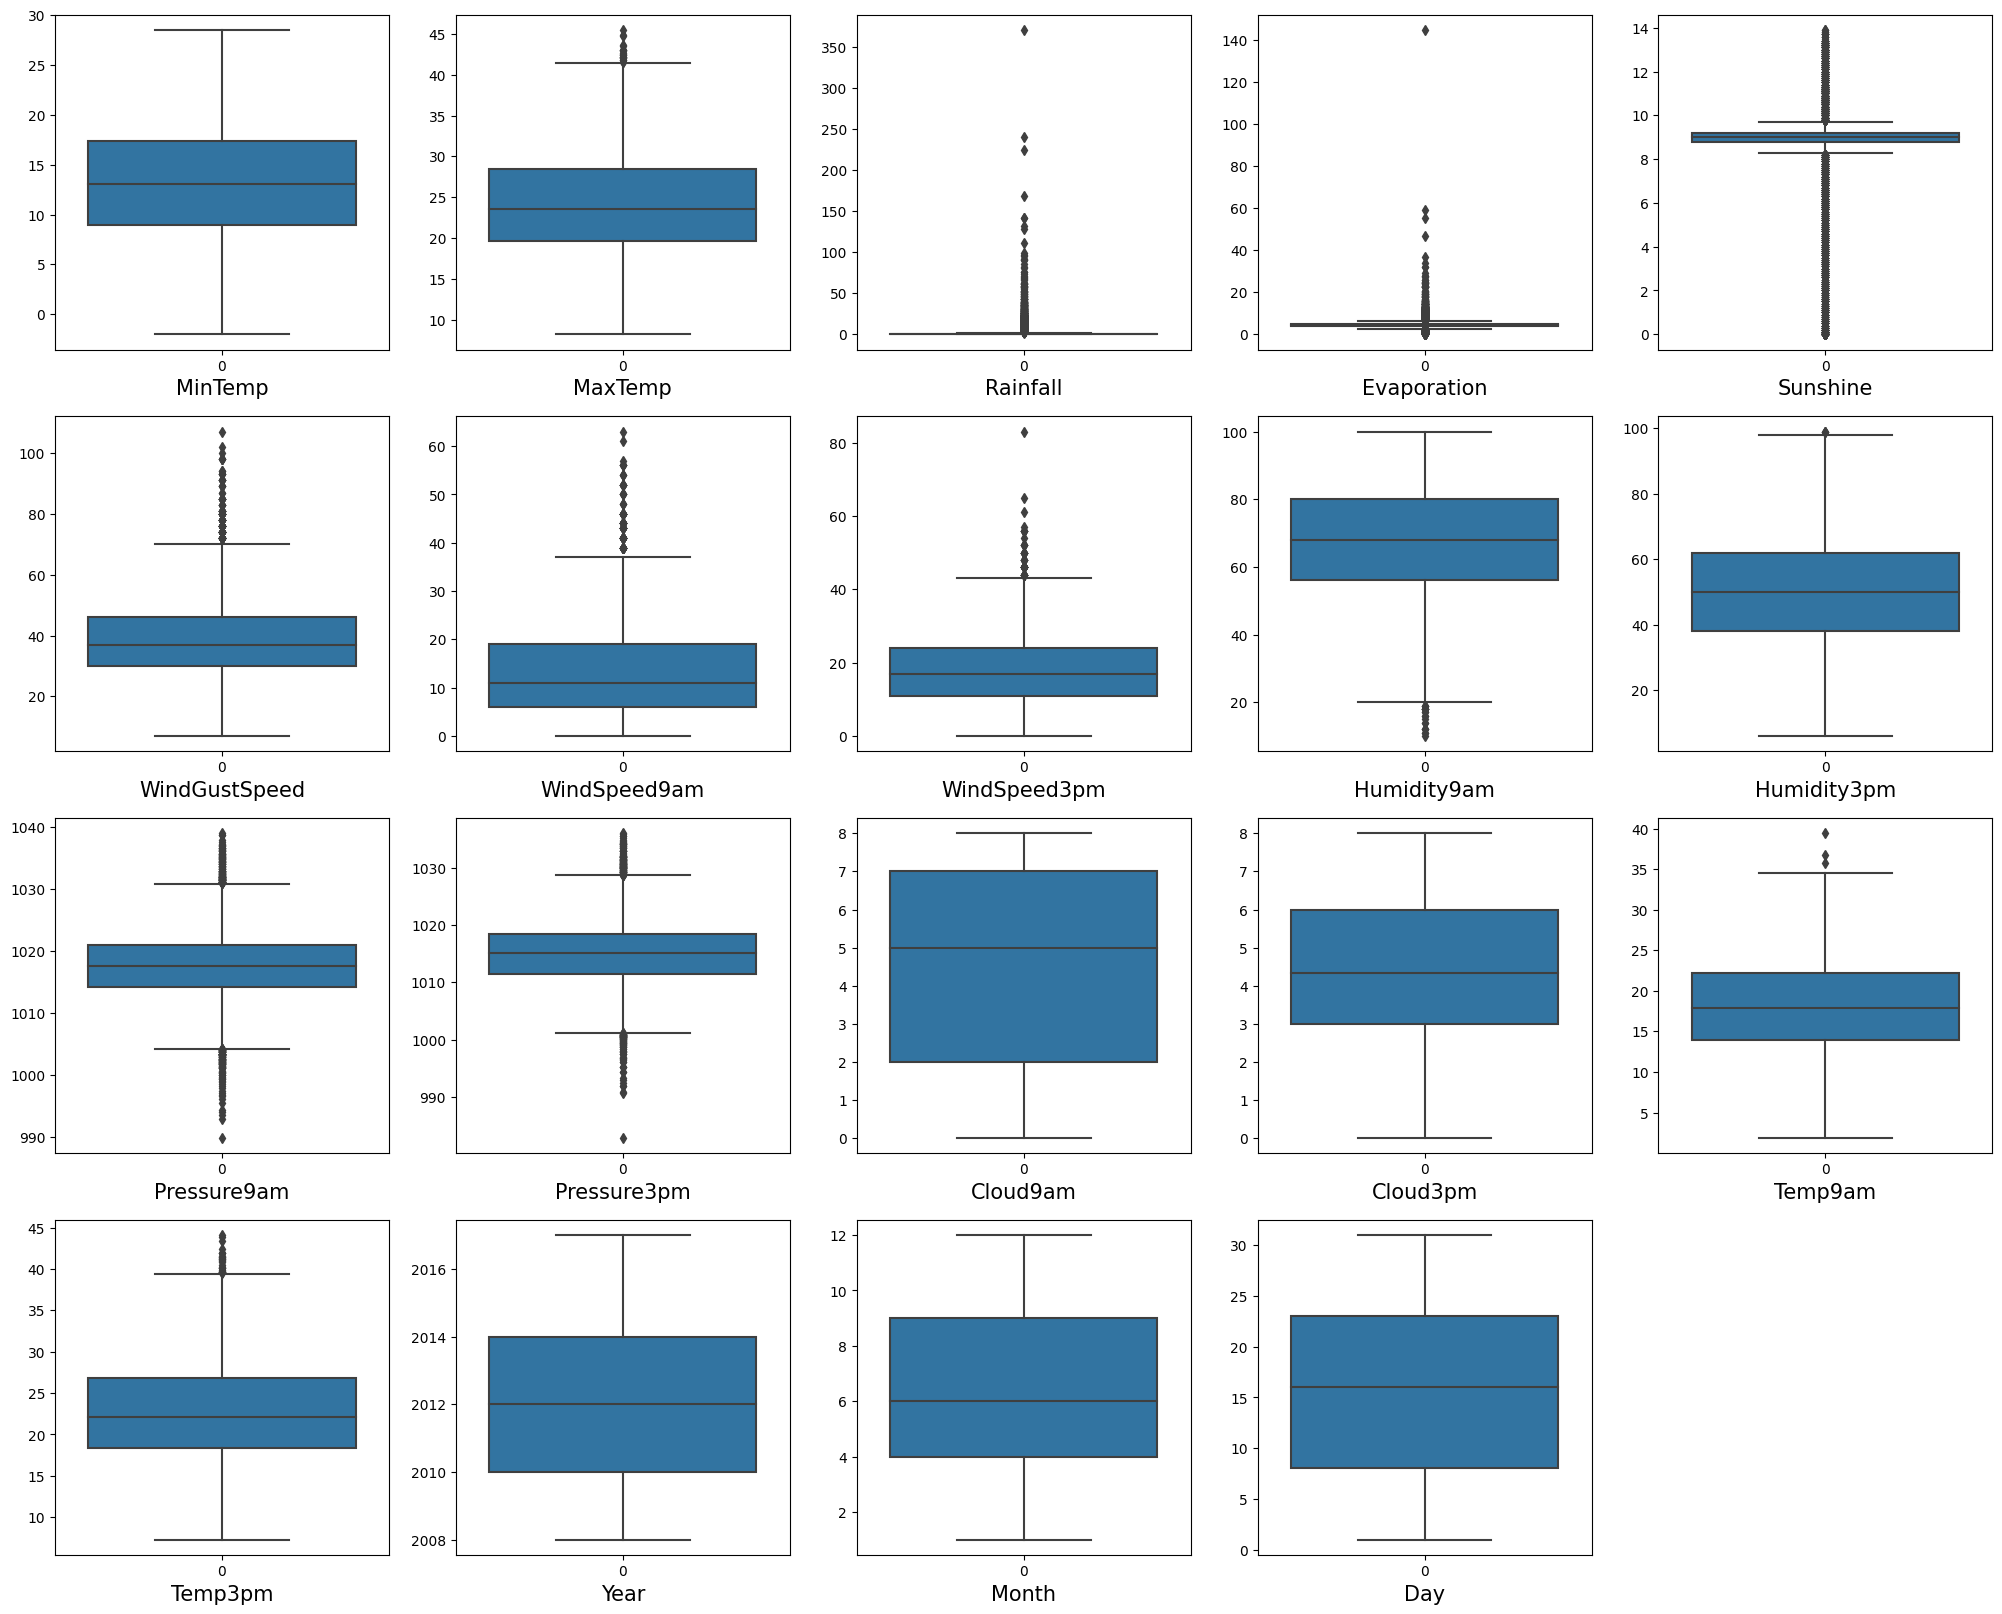

In [59]:
# Will check for outliers

numerical_columns = rainfall_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                     'Year', 'Month', 'Day']]

plt.figure(figsize=(25,20))
graph = 1

for column in numerical_columns:
  if graph<=21:
    plt.subplot(4,5,graph)
    ax=sns.boxplot(data= numerical_columns[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

In [60]:
# Will use z-score method for treating outliers

columns_with_outliers = ['MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                         'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm' ]

from scipy import stats

# Define a threshold for the Z-score
z_score_threshold = 3

# Numerical columns are as defined above

# Create a copy of the dataset for outlier treatment
no_outliers_new = rainfall_data.copy()

for col in columns_with_outliers:
    z_scores = stats.zscore(no_outliers_new[col])
    no_outliers_new = no_outliers_new[(z_scores < z_score_threshold) & (z_scores > -z_score_threshold)]

# Display the shape of the dataset after removing outliers
print("Shape of data after outlier removal:", no_outliers_new.shape)

Shape of data after outlier removal: (6351, 25)


#### Skewness

<ipython-input-61-6b23f6b06b5d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(numerical_columns[column])
<ipython-input-61-6b23f6b06b5d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(numerical_columns[column])
<ipython-input-61-6b23f6b06b5d>:11: UserWarning: 

`distplot` is a depre

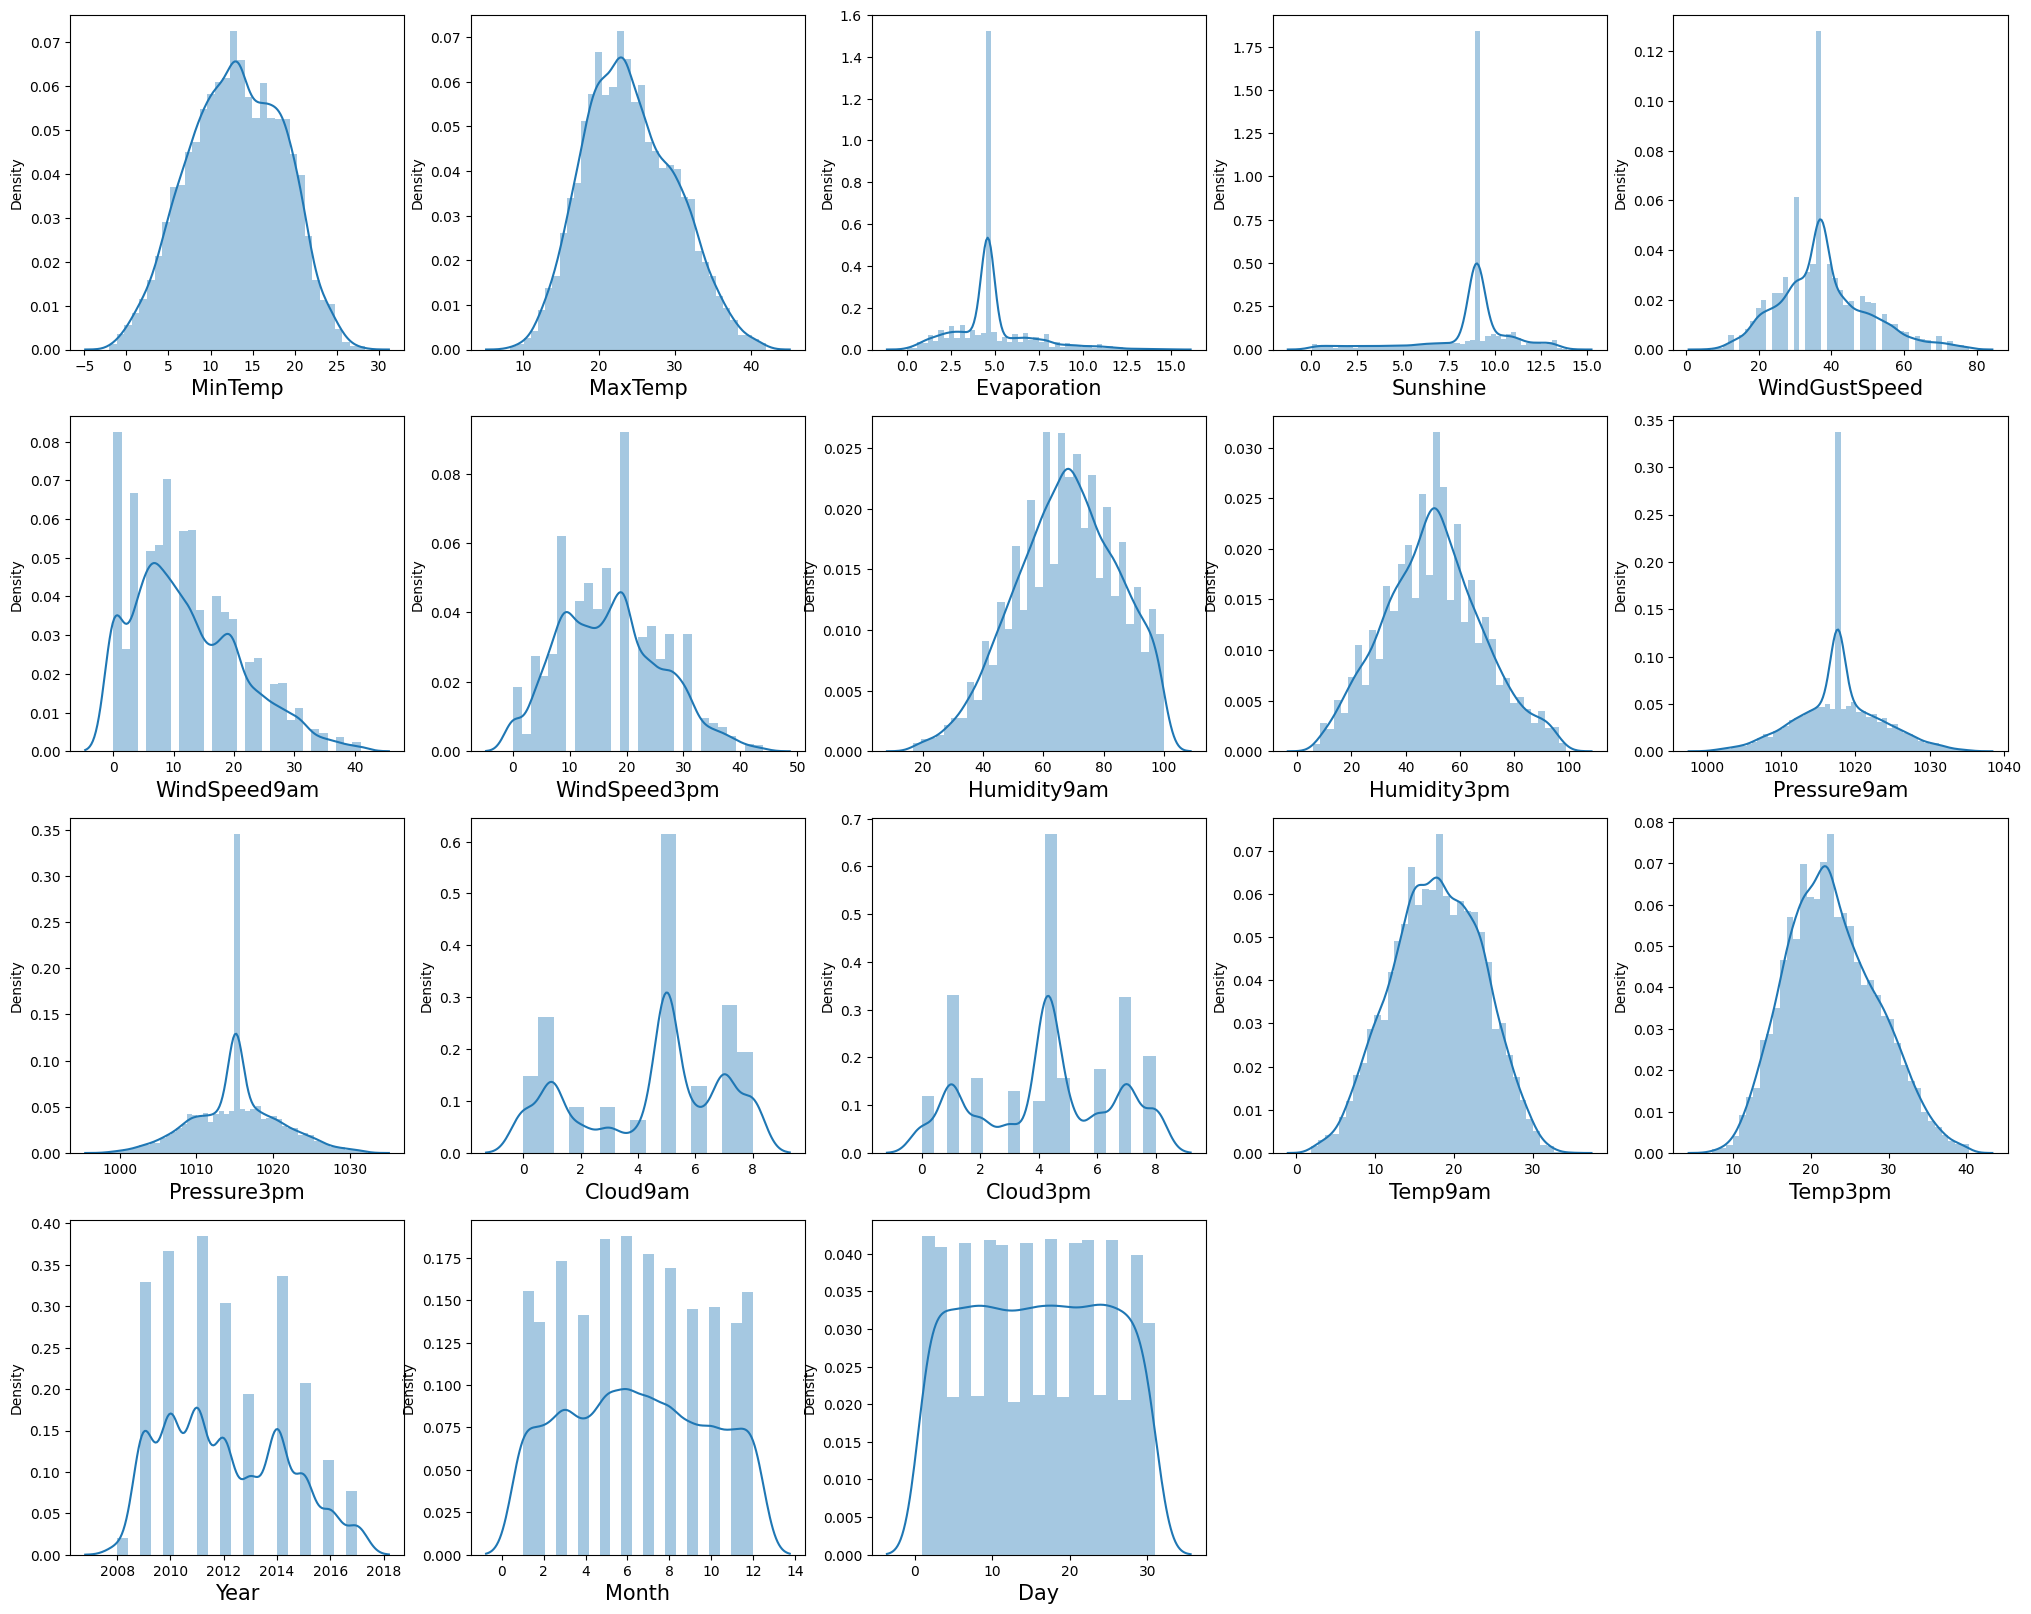

In [61]:
numerical_columns = no_outliers_new[['MinTemp', 'MaxTemp','Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                     'Year', 'Month', 'Day']]

plt.figure(figsize=(25,20))
graph = 1

for column in numerical_columns:
  if graph<=21:
    plt.subplot(4,5,graph)
    ax=sns.distplot(numerical_columns[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

**Insights from above chart:**

* **Symmetric Distribution:**

  'MinTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Month', 'Day': These features display relatively symmetric distributions with no significant skewness.

* **Right-Skewed Distribution:**

  'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Temp3pm', 'Year': These features show right-skewed distributions, with data tending towards lower values and an elongated tail towards higher values.

* **Left-Skewed Distribution:**

  'Sunshine', 'Humidity9am', 'Cloud9am', 'Cloud3pm': These features exhibit left-skewed distributions, where data is concentrated towards higher values with a tail extending towards lower values.

**Skewness is present in 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', and 'WindSpeed9am' columns but 'Rainfall' is the target variable so, it will not be considered for skewness reduction.**

In [62]:
# List of the columns to be transformed
columns_to_transform = ['Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am']

# Copying data
#updated_df_r2 = updated_df_r.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform:
    transformed_data, lambda_value = yeojohnson(no_outliers_new[column] + 1)
    no_outliers_new[column] = transformed_data


# Again checking the skewness
no_outliers_new[columns_to_transform].skew()

Evaporation      0.029737
Sunshine        -0.052154
WindGustSpeed    0.008201
WindSpeed9am    -0.092712
dtype: float64

### Heatmap and Correlation Matrix

               Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.090439  0.067503 -0.000570     0.107737  0.066244   
MinTemp        0.090439  1.000000  0.735625  0.085672     0.388570  0.073489   
MaxTemp        0.067503  0.735625  1.000000 -0.082721     0.482858  0.360627   
Rainfall      -0.000570  0.085672 -0.082721  1.000000    -0.047591 -0.146284   
Evaporation    0.107737  0.388570  0.482858 -0.047591     1.000000  0.465309   
Sunshine       0.066244  0.073489  0.360627 -0.146284     0.465309  1.000000   
WindGustDir   -0.084884 -0.141874 -0.198569  0.029214    -0.119871 -0.118458   
WindGustSpeed  0.274600  0.265871  0.184090  0.065831     0.211493  0.049457   
WindDir9am    -0.100910 -0.017949 -0.193419  0.098671    -0.112575 -0.112445   
WindDir3pm     0.005011 -0.144480 -0.168805  0.038746    -0.026321 -0.054580   
WindSpeed9am   0.229524  0.195277  0.075412  0.037128     0.144873  0.023828   
WindSpeed3pm   0.221858  0.199857  0.124

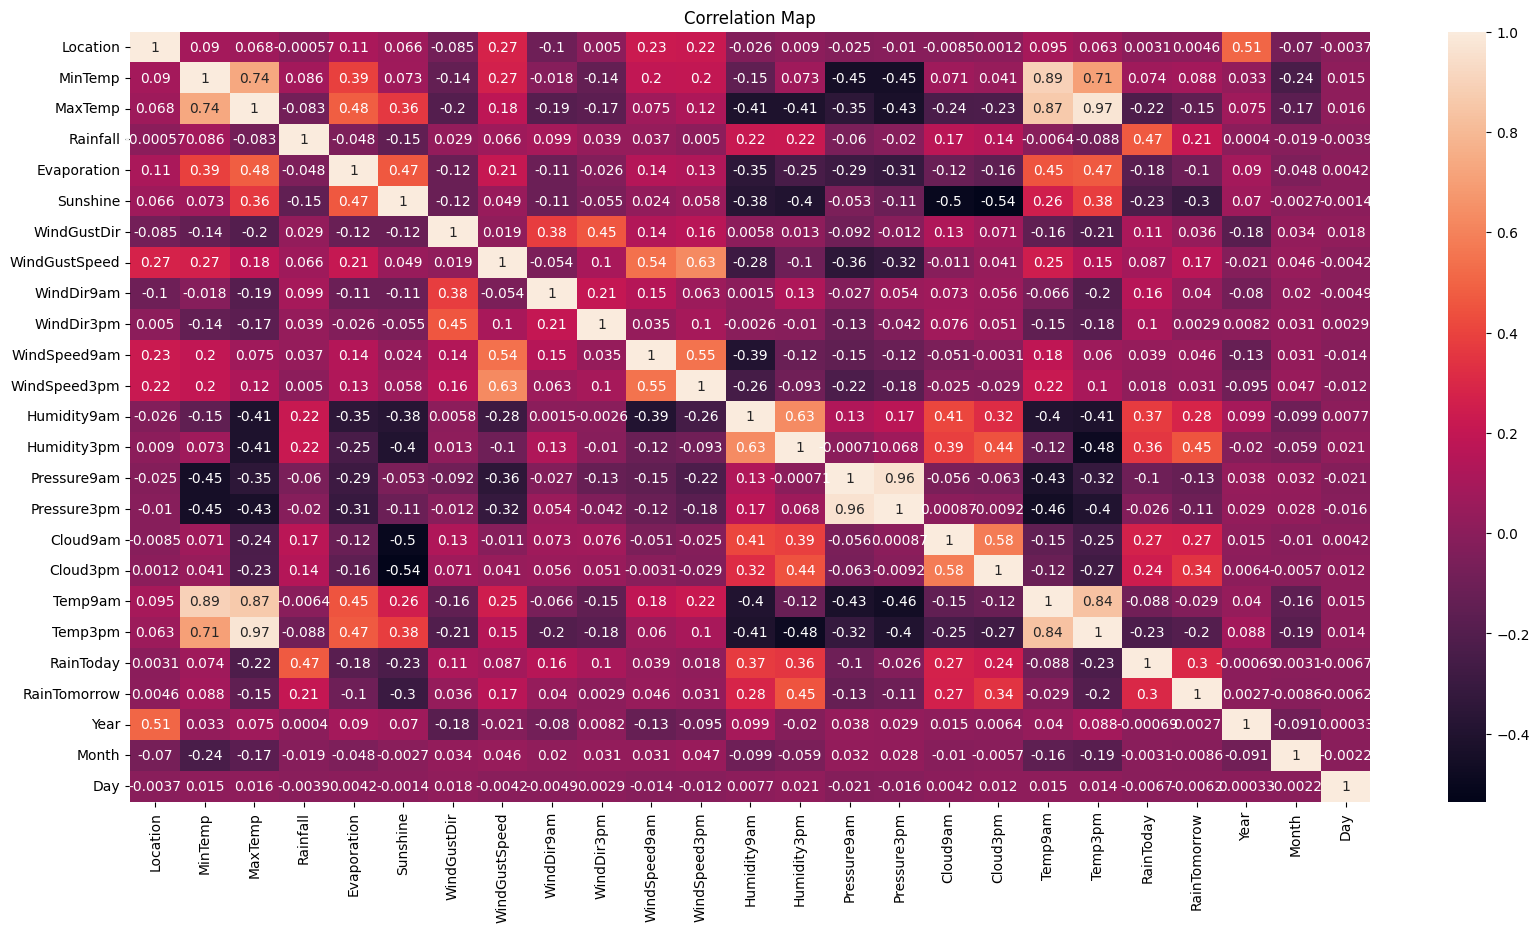

In [63]:
correlation_data = no_outliers_new

correlation_matrix = correlation_data.corr()

print(correlation_matrix)

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

**Insights from Heatmap and correlation:**

* Location: Strong positive correlation with 'Year', weak negative correlation with 'Sunshine', minimal correlation with other numerical variables.

* Temperature: Strong positive correlations among temperature-related variables, negative correlations with humidity.

* Rainfall: Positive correlation with wind speeds, negative correlation with sunshine, evaporation, and afternoon cloudiness.

* Evaporation: Positive correlation with temperatures, negative correlation with humidity.

* Sunshine: Positive correlation with temperatures, negative correlation with rainfall and afternoon cloudiness.

* WindGustSpeed, WindSpeed9am, WindSpeed3pm: Positive correlation among wind speed variables.

* Humidity9am, Humidity3pm: Negative correlation with temperature, indicating inverse relation with humidity.

* Pressure9am, Pressure3pm: Negative correlation with 'Location', positive correlation with 'Year'.

* Cloud9am, Cloud3pm: Negative correlation with sunshine, positive correlation with humidity.

* Temp9am, Temp3pm: Strong positive correlations among temperature-related variables.

* RainToday, RainTomorrow: Weak correlation between these binary rain indicators.

* Year, Month, Day: Some correlations with weather-related variables, suggesting potential weather changes over time, but not very strong.

### To check VIF, will define feature and target Variables

In [64]:
x = no_outliers_new.drop(columns=['Rainfall'])
y = no_outliers_new['Rainfall']

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

vif       features
0    1.660800       Location
1    9.258360        MinTemp
2   26.272175        MaxTemp
3    1.724480    Evaporation
4    2.055300       Sunshine
5    1.587925    WindGustDir
6    2.325443  WindGustSpeed
7    1.349361     WindDir9am
8    1.423779     WindDir3pm
9    2.040153   WindSpeed9am
10   1.999314   WindSpeed3pm
11   4.119597    Humidity9am
12   5.605045    Humidity3pm
13  19.891471    Pressure9am
14  19.248692    Pressure3pm
15   1.934019       Cloud9am
16   1.882217       Cloud3pm
17  17.849865        Temp9am
18  32.771875        Temp3pm
19   1.414875      RainToday
20   1.450200   RainTomorrow
21   1.581328           Year
22   1.144982          Month
23   1.004585            Day

**'Temp3pm' feature has highest VIF value let's drop it and again calculate the VIF values**

In [65]:
# Dropping 'Temp3pm' feature

no_outliers_new.drop('Temp3pm', inplace = True, axis = 1)

In [66]:
# Again Checking for VIF,

x = no_outliers_new.drop(columns=['Rainfall'])
y = no_outliers_new['Rainfall']

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

vif       features
0    1.660715       Location
1    9.210251        MinTemp
2    9.577047        MaxTemp
3    1.724377    Evaporation
4    2.053212       Sunshine
5    1.584233    WindGustDir
6    2.318712  WindGustSpeed
7    1.348166     WindDir9am
8    1.422929     WindDir3pm
9    2.039644   WindSpeed9am
10   1.993893   WindSpeed3pm
11   3.672540    Humidity9am
12   3.912849    Humidity3pm
13  19.442001    Pressure9am
14  18.869453    Pressure3pm
15   1.931114       Cloud9am
16   1.872948       Cloud3pm
17  16.555945        Temp9am
18   1.414375      RainToday
19   1.450192   RainTomorrow
20   1.581328           Year
21   1.129950          Month
22   1.004107            Day

**'Pressure9am' feature has highest VIF value let's drop it and again calculate the VIF values.**

In [67]:
# Dropping 'Pressure9am' feature

no_outliers_new.drop('Pressure9am', inplace = True, axis = 1)

In [68]:
# Again Checking for VIF,

x = no_outliers_new.drop(columns=['Rainfall'])
y = no_outliers_new['Rainfall']

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

vif       features
0    1.659201       Location
1    9.112293        MinTemp
2    9.225818        MaxTemp
3    1.711629    Evaporation
4    2.045056       Sunshine
5    1.571427    WindGustDir
6    2.297550  WindGustSpeed
7    1.324394     WindDir9am
8    1.350563     WindDir3pm
9    2.033855   WindSpeed9am
10   1.983841   WindSpeed3pm
11   3.671646    Humidity9am
12   3.912475    Humidity3pm
13   1.449570    Pressure3pm
14   1.931083       Cloud9am
15   1.870473       Cloud3pm
16  16.507994        Temp9am
17   1.396538      RainToday
18   1.444642   RainTomorrow
19   1.580971           Year
20   1.128899          Month
21   1.003252            Day

**'Temp9am' feature has highest VIF value let's drop it and again calculate the VIF values.**

In [69]:
# Dropping 'Temp9am' feature
no_outliers_new.drop('Temp9am', inplace = True, axis = 1)

In [70]:
# Again Checking for VIF,

x = no_outliers_new.drop(columns=['Rainfall'])
y = no_outliers_new['Rainfall']

scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

# VIF

vif = pd.DataFrame()

vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

vif       features
0   1.656608       Location
1   4.812097        MinTemp
2   5.557528        MaxTemp
3   1.705286    Evaporation
4   2.038553       Sunshine
5   1.569156    WindGustDir
6   2.260790  WindGustSpeed
7   1.323398     WindDir9am
8   1.350443     WindDir3pm
9   2.011309   WindSpeed9am
10  1.929527   WindSpeed3pm
11  2.586615    Humidity9am
12  3.127323    Humidity3pm
13  1.446675    Pressure3pm
14  1.896936       Cloud9am
15  1.868609       Cloud3pm
16  1.392902      RainToday
17  1.444015   RainTomorrow
18  1.575673           Year
19  1.114175          Month
20  1.003137            Day

**Now, the VIF values for all the features fall within a certain range.**

### ML Model - 1

#### Linear Regression

In [71]:
# Importing Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
import math

# Defining x and y variable

x = no_outliers_new.drop(columns=['Rainfall'])
y = no_outliers_new['Rainfall']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
LR = LinearRegression()
LR.fit(x_train, y_train)

# Predicting on test set results
y_pred = LR.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100
#models_r2_score.append(r2score)

mae = mean_absolute_error(y_test,y_pred)
#models_mae.append(mae)

mse = mean_squared_error(y_test,y_pred)
#models_mse.append(mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#models_rmse.append(rmse)

print('Linear Regression')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')

# Importing Necessary Libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression


# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

parameters_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2, 4]
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(LinearRegression(), param_grid = parameters_grid, cv = 5, scoring = 'r2')

# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Linear regression after hypertuning model :",grid_search_cv.best_score_*100)

Linear Regression
R2 score: 25.486990168515955
Mean Absolute Error: 2.752651470186015
Mean Square Error: 55.30343845313341
Root Mean Square Error: 7.4366281642377015




Lasso Regression MSE:  55.22980519895659
Lasso Regression R-squared:  25.586199829720858
Best Lasso Alpha:  0.01




Ridge Regression MSE:  55.219717876996675
Ridge Regression R-squared:  25.599790968742152
Best Ridge Alpha:  10


Best Parameters for hypertuning Parameters : {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}
Best Score for Linear regression after hypertuning model : 29.611152330356216


**Insights from Linear regression:**
* The R2 score explains the proportion of variance captured by the model. A score of 25.49% indicates that the model explains about 25.49% of the variance in the target variable.
* On average, the model's predictions are off by approximately 2.75 units from the actual values.
* Lasso Regression performs slightly better than simple Linear Regression, with a similar level of model fit (R-squared) but a slightly lower MSE.
* Ridge Regression also showcases a slight improvement over simple Linear Regression, with similar performance to Lasso but with a slightly lower MSE.
* Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}
* The post-hyperparameter-tuning R2 score increased slightly to 29.61%, indicating a moderate improvement in model performance.

**The performance metrics suggest that simple Linear Regression, Lasso, and Ridge Regression models achieve relatively comparable performance. Ridge and Lasso regressions slightly outperform simple Linear Regression, but the differences are not substantial.**

### ML Model - 2

#### K Nearest Neighbors Regressor

In [73]:
from sklearn.neighbors import KNeighborsRegressor

# Defining x and y variable

x = no_outliers_new.drop(columns=['Rainfall'])
y = no_outliers_new['Rainfall']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
kNN = KNeighborsRegressor()
kNN.fit(x_train, y_train)

# Predicting on test set results
y_pred = kNN.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100
#models_r2_score.append(r2score)

mae = mean_absolute_error(y_test,y_pred)
#models_mae.append(mae)

mse = mean_squared_error(y_test,y_pred)
#models_mse.append(mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#models_rmse.append(rmse)

print('K Neighbors Regressor')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid = {
    'algorithm': ['kd_tree', 'brute'],
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for K Neighbors Regressor after hypertuning model :",grid_search_cv.best_score_*100)

K Neighbors Regressor
R2 score: 16.070489695560354
Mean Absolute Error: 2.183788037775446
Mean Square Error: 62.292350262329485
Root Mean Square Error: 7.892550301539388




Lasso Regression MSE:  55.22980519895659
Lasso Regression R-squared:  25.586199829720858
Best Lasso Alpha:  0.01




Ridge Regression MSE:  55.219717876996675
Ridge Regression R-squared:  25.599790968742152
Best Ridge Alpha:  10


Best Parameters for hypertuning Parameters : {'algorithm': 'kd_tree', 'n_neighbors': 11, 'weights': 'uniform'}
Best Score for K Neighbors Regressor after hypertuning model : 24.512311291599552


**Insights from K Neighbors Regressor:**
* 16.07% indicates the proportion of variance captured by the model. A lower R2 score suggests the model doesn't explain the variability well.
*  2.18 represents the average absolute difference between predicted and actual values.7.89 represents the square root of MSE and signifies the average prediction error.62.29 measures the average of squared differences between predicted and actual values.
* For Lasso, R-squared: 25.59% indicates a better proportion of variance explained compared to K Neighbors Regressor. For Ridge, R-squared: 25.60% also similar to Lasso, indicating a comparable proportion of variance explained.
* Best Parameters: 'algorithm': 'kd_tree', 'n_neighbors': 11, 'weights': 'uniform'. 24.51% after tuning; an improvement compared to the untuned K Neighbors Regressor but still lower than Lasso and Ridge.

**Lasso and Ridge Regression models demonstrate better predictive performance compared to the untuned K Neighbors Regressor, showcasing lower errors and higher R-squared values.**


### ML Model - 3

#### Decision Tree Regressor

In [74]:
from sklearn.tree import DecisionTreeRegressor

# Defining x and y variable

x = no_outliers_new.drop(columns=['Rainfall'])
y = no_outliers_new['Rainfall']


# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)

# Predicting on test set results
y_pred = decision_tree.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100
#models_r2_score.append(r2score)

mae = mean_absolute_error(y_test,y_pred)
#models_mae.append(mae)

mse = mean_squared_error(y_test,y_pred)
#models_mse.append(mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#models_rmse.append(rmse)

print('Decision Tree Regressor Model')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_dt = {
    'criterion': ['squared_error'],
    'max_depth': range(5, 10),
    'min_samples_leaf': range(1, 3),
    'min_samples_split': range(1, 5),
    'max_leaf_nodes': range(3, 6)
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid_dt, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Decision Tree Regressor after hypertuning model :",grid_search_cv.best_score_*100)

Decision Tree Regressor Model
R2 score: -23.525024781732505
Mean Absolute Error: 2.668467995802728
Mean Square Error: 91.68007869884575
Root Mean Square Error: 9.574971472482085




Lasso Regression MSE:  55.22980519895659
Lasso Regression R-squared:  25.586199829720858
Best Lasso Alpha:  0.01




Ridge Regression MSE:  55.219717876996675
Ridge Regression R-squared:  25.599790968742152
Best Ridge Alpha:  10


Best Parameters for hypertuning Parameters : {'criterion': 'squared_error', 'max_depth': 6, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best Score for Decision Tree Regressor after hypertuning model : 28.010271922060305


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

**Insights from Decision Tree Regressor:**
* The R2 score is significantly negative (-23.52), indicating that the model performs poorly and might be overfitting or capturing the noise in the data.
* The MAE is 2.67, which represents the average absolute difference between predicted and actual values. A lower MAE is better; however, this needs to be considered along with other metrics.
* The Lasso Regression's MSE is 55.23, representing the average of the squared differences between predicted and actual values. Lower MSE values are preferred for better model accuracy.The R-squared score for Lasso Regression is 25.59, indicating that around 25.59% of the variance in the target variable is explained by the model.
* Ridge Regression's MSE is similar to Lasso at 55.22, indicating a comparable average squared difference between predicted and actual values.The R-squared score for Ridge Regression is also similar to Lasso at 25.60, explaining a similar percentage of variance as Lasso.

**The Decision Tree Regressor model has performed exceptionally poorly with a highly negative R2 score and relatively high errors.Hyperparameter tuning slightly improved the Decision Tree Regressor's performance, but it's still relatively low (R2 score of 28%).**

### ML Model - 4

#### Random Forest Regressor()

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Defining x and y variable

x = no_outliers_new.drop(columns=['Rainfall'])
y = no_outliers_new['Rainfall']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

# Predicting on test set results
y_pred = random_forest.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100
#models_r2_score.append(r2score)

mae = mean_absolute_error(y_test,y_pred)
#models_mae.append(mae)

mse = mean_squared_error(y_test,y_pred)
#models_mse.append(mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#models_rmse.append(rmse)

print('Random Forest Regressor Model')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_rf = {
    'n_estimators': [100, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto']
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(RandomForestRegressor(), param_grid=param_grid_rf, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Decision Tree Regressor after hypertuning model :",grid_search_cv.best_score_*100)

Random Forest Regressor Model
R2 score: 23.785483298112553
Mean Absolute Error: 2.192294333683106
Mean Square Error: 56.56629417051417
Root Mean Square Error: 7.52105671900659




Lasso Regression MSE:  55.22980519895659
Lasso Regression R-squared:  25.586199829720858
Best Lasso Alpha:  0.01




Ridge Regression MSE:  55.219717876996675
Ridge Regression R-squared:  25.599790968742152
Best Ridge Alpha:  10




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters for hypertuning Parameters : {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for Decision Tree Regressor after hypertuning model : 29.712259955450882


**Insights from Decision Tree Regressor:**
* R2 score: 23.79,Mean Absolute Error: 2.19,Mean Square Error: 56.57 and Root Mean Square Error: 7.52. A score of 23.79% suggests moderate predictability, but there's room for improvement.
* Lasso Regression MSE: 55.23, R-squared: 25.59, Best Alpha: 0.01. Ridge Regression MSE: 55.22, R-squared: 25.60, Best Alpha: 10
* Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
* Best Score: 29.71

**The Random Forest Regressor, despite being a complex model, shows moderate predictive ability but might benefit from further tuning or feature engineering.Decision Tree Regressor, after hyperparameter tuning, displays an improved score compared to its initial performance, indicating the efficacy of hyperparameter optimization.**

### ML Model - 5

#### Extra Trees Regressor

In [76]:
from sklearn.ensemble import ExtraTreesRegressor

# Defining x and y variable

x = no_outliers_new.drop(columns=['Rainfall'])
y = no_outliers_new['Rainfall']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
extra_tree = ExtraTreesRegressor()
extra_tree.fit(x_train, y_train)

# Predicting on test set results
y_pred = extra_tree.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100

mae = mean_absolute_error(y_test,y_pred)

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Extra Trees Regressor Model')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_et = {
    'n_estimators': [100, 300],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesRegressor(), param_grid=param_grid_et, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Extra Trees Regressor after hypertuning model :",grid_search_cv.best_score_*100)

Extra Trees Regressor Model
R2 score: 24.019872198456603
Mean Absolute Error: 2.2455293809024135
Mean Square Error: 56.392331098111235
Root Mean Square Error: 7.509482745043845




Lasso Regression MSE:  55.22980519895659
Lasso Regression R-squared:  25.586199829720858
Best Lasso Alpha:  0.01




Ridge Regression MSE:  55.219717876996675
Ridge Regression R-squared:  25.599790968742152
Best Ridge Alpha:  10




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters for hypertuning Parameters : {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Score for Extra Trees Regressor after hypertuning model : 31.270624758595687


**Insights from Extraa Tree Regressor:**
* The R2 score indicates that the Extra Trees model explains around 24.02% of the variance in the target variable, which is relatively low.The Mean Squared Error (56.39) and Root Mean Squared Error (7.51) are high, suggesting moderate accuracy but significant errors in predictions.
* Both Lasso and Ridge regressions demonstrate similar performance with slightly better R-squared values (25.59% and 25.60%, respectively) compared to the Extra Trees model.
* The Extra Trees model underwent hyperparameter tuning, but even after tuning, the R2 score improved to 31.27%, showing some enhancement but still indicating modest predictive capability

**The models, including Extra Trees, Lasso, and Ridge regressions, demonstrate relatively moderate performance, capturing around 24-25% of the variance in the target variable.**

### ML Model - 6

#### Gradient Boosting Regressor

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

# Defining x and y variable

x = no_outliers_new.drop(columns=['Rainfall'])
y = no_outliers_new['Rainfall']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(x_train, y_train)

# Predicting on test set results
y_pred = gradient_boost.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100

mae = mean_absolute_error(y_test,y_pred)

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Gradient Boosting Regressor Model')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_gb = {
    'loss': ['quantile'],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
}


# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid_gb, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Gradient Boosting Regressor after hypertuning model :",grid_search_cv.best_score_*100)

Gradient Boosting Regressor Model
R2 score: 26.945625482957812
Mean Absolute Error: 2.3050877326684187
Mean Square Error: 54.22084162178494
Root Mean Square Error: 7.363480265593501




Lasso Regression MSE:  55.22980519895659
Lasso Regression R-squared:  25.586199829720858
Best Lasso Alpha:  0.01




Ridge Regression MSE:  55.219717876996675
Ridge Regression R-squared:  25.599790968742152
Best Ridge Alpha:  10


Best Parameters for hypertuning Parameters : {'learning_rate': 0.05, 'loss': 'quantile', 'max_depth': 5, 'n_estimators': 50}
Best Score for Gradient Boosting Regressor after hypertuning model : -4.204112138940039


**Insights from Gradient Boosting Regressor:**
* The model shows a higher R2 score compared to Lasso and Ridge regressions, indicating it explains more variance in the data. However, an R2 of 26.95% might still suggest moderate predictive capability.
* MAE and RMSE: Both Gradient Boosting and regularized regressions (Lasso and Ridge) showcase similar MSE values, suggesting comparable predictive performance in terms of error.
* Lasso and Ridge Regression: They perform similarly, with R2 scores around 25-26%, indicating moderate explanatory power.
* Best Parameters: {'learning_rate': 0.05, 'loss': 'quantile', 'max_depth': 5, 'n_estimators': 50}
* Best Score after Hypertuning: -4.20

**Gradient Boosting shows slightly better performance compared to Lasso and Ridge regressions based on R2, but the overall explanatory power seems moderate.Hypertuning significantly improved the Gradient Boosting model, achieving a considerably negative score.**

### ML Model - 7

#### Ada Boost Regressor

In [79]:
from sklearn.ensemble import AdaBoostRegressor

# Defining x and y variable

x = no_outliers_new.drop(columns=['Rainfall'])
y = no_outliers_new['Rainfall']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting linear regressio to training set
ada_boost = AdaBoostRegressor()
ada_boost.fit(x_train, y_train)

# Predicting on test set results
y_pred = ada_boost.predict(x_test)
y_pred

# Evalution Matrix

r2score = r2_score(y_test,y_pred)*100

mae = mean_absolute_error(y_test,y_pred)

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Ada Boost Regressor Model')
print("R2 score:", r2score)
print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print('\n')


# Lasso Regression model with hyperparameter tuning
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid.fit(x_train, y_train)

# Evaluate the Lasso Regression model
lasso_predictions = lasso_grid.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print('\n')
print("Lasso Regression MSE: ", lasso_mse)
print("Lasso Regression R-squared: ", lasso_r2*100)
print("Best Lasso Alpha: ", lasso_grid.best_params_['alpha'])
print('\n')


# Similarly for ridge regression

# Ridge Regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid.fit(x_train, y_train)

# Evaluate the Ridge Regression model
ridge_predictions = ridge_grid.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print('\n')
print("Ridge Regression MSE: ", ridge_mse)
print("Ridge Regression R-squared: ", ridge_r2*100)
print("Best Ridge Alpha: ", ridge_grid.best_params_['alpha'])
print('\n')

# Will move further with hypertuning

# Parameters grid for hyper parameter tuning

param_grid_abr = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'loss': ['linear', 'square']
}

# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(AdaBoostRegressor(), param_grid=param_grid_abr, cv=5, scoring='r2')


# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(x_train, y_train)

# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

# Storing the best parameters
best_params = grid_search_cv.best_params_

# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

print("Best Parameters for hypertuning Parameters :",best_params)
print("Best Score for Ada Boost Regressor after hypertuning model :",grid_search_cv.best_score_*100)

Ada Boost Regressor Model
R2 score: -182.6810815808058
Mean Absolute Error: 9.32357491037598
Mean Square Error: 209.8054532010564
Root Mean Square Error: 14.484662688549443




Lasso Regression MSE:  55.22980519895659
Lasso Regression R-squared:  25.586199829720858
Best Lasso Alpha:  0.01




Ridge Regression MSE:  55.219717876996675
Ridge Regression R-squared:  25.599790968742152
Best Ridge Alpha:  10


Best Parameters for hypertuning Parameters : {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}
Best Score for Ada Boost Regressor after hypertuning model : 29.525398549409886


**Insights from Ada Boost Regressor:**
* AdaBoost Performance: The AdaBoost Regressor's extremely negative R2 score suggests substantial issues with its predictive capability, possibly indicating severe overfitting or a poorly fitted model.
* Lasso and Ridge Regression: Both Lasso and Ridge Regression models show similar performance, explaining around 25-26% of the variance in the target variable. The chosen alphas (0.01 for Lasso and 10 for Ridge) might indicate the level of regularization applied.
* After hyperparameter tuning, AdaBoost's R2 score improved to 29.53%.

# **Conclusion:**

### Among these models, the Gradient Boosting Regressor showcases the highest R2 score (a measure of explained variance) and comparatively lower error metrics (MAE, MSE, RMSE).

* Gradient Boosting Regressor:

  R2 score: 26.95%

  Mean Absolute Error: 2.31

  Mean Square Error: 54.22

  Root Mean Square Error: 7.36


Saving for bes model, 'Rainfall_best_Model'

In [80]:
# Save the model to a file
with open('Rainfall_best_Model.pkl', 'wb') as file:
    pickle.dump(gradient_boost, file)


# Load the saved model from file
with open('Rainfall_best_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)




---



# **Thank-You**


---


